# 부산광역시 쓰레기 배출량 예측 pt.3

### : 폐기물 데이터 EDA 후 주제 선정

---

<br>

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# 경고 메시지는 출력 X
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin':           # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':        # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<Axes: title={'center': '한글타이틀'}>

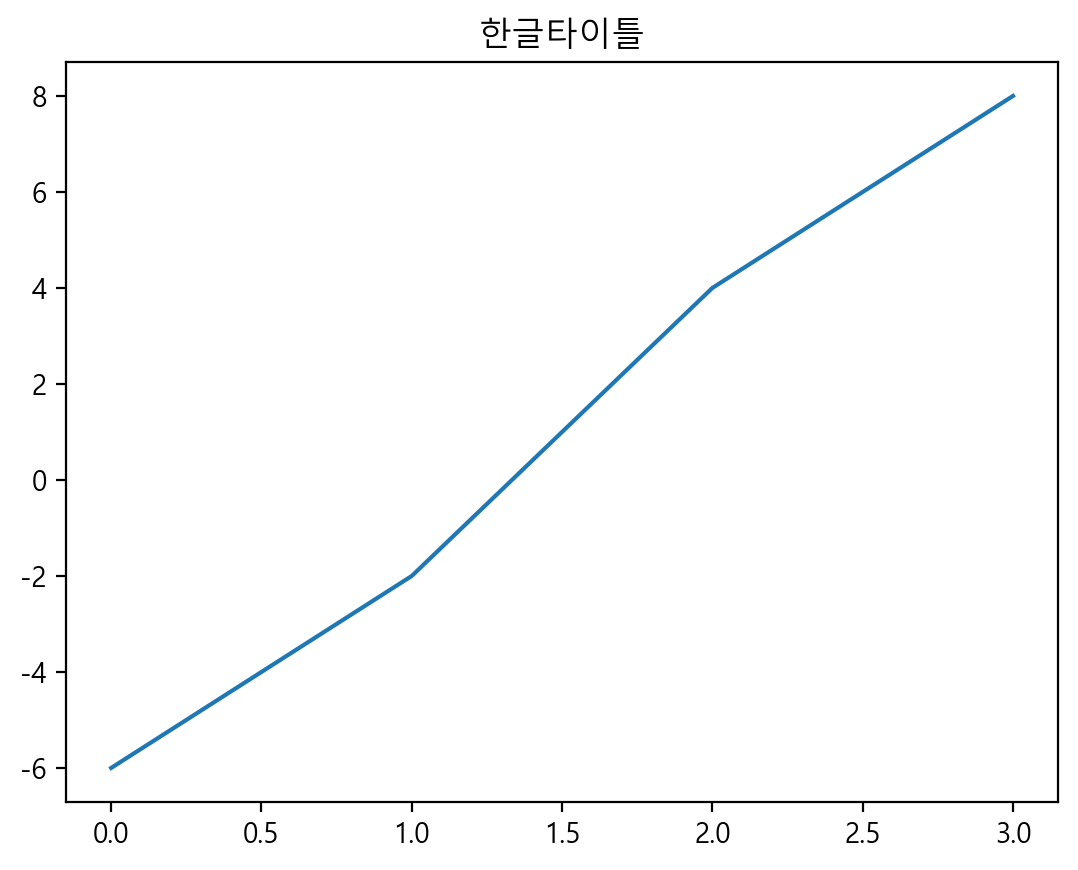

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

<br><br>

---
## 01. 폐기물 데이터

<br>

### 01-1. 데이터 불러오기

In [22]:
# 전처리된 폐기물 데이터
waste = pd.read_csv("data/폐기물데이터_행정구역변경_2.csv", encoding="cp949")

print(f"waste shape: {waste.shape}")
waste

waste shape: (42365, 12)


,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
0,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,0.0,9125.0,4672.0,0.0,13797.0,2019
1,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,5365.5,2737.5,0.0,8103.0,2019
2,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,0.0,182.5,73.0,0.0,255.5,2019
3,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,511.0,255.5,0.0,766.5,2019
4,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,693.5,365.0,0.0,1058.5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
42360,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐전기전자제품,NaN,1027.6,0.0,0.0,0.0,1027.6,2023
42361,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐가구류,NaN,0.0,0.0,0.0,0.0,0.0,2023
42362,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,기타,NaN,200.0,0.0,0.0,0.0,200.0,2023
42363,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,재활용 잔재물,NaN,0.0,1627.4,718.0,0.0,2345.4,2023


<br>

### 01-2. 폐기물 종류 - 종류1 - 종류2의 value 확인

In [23]:
waste["폐기물_종류"].unique()

array(['종량제방식 등 혼합배출', '재활용 가능자원  분리배출', '음식물류 폐기물 분리배출'], dtype=object)

In [24]:
print(f"종량제방식: {waste[waste['폐기물_종류']=='종량제방식 등 혼합배출']['폐기물_종류1'].unique()}\n")
print(f"재활용 자원: {waste[waste['폐기물_종류']=='재활용 가능자원  분리배출']['폐기물_종류1'].unique()}\n")
print(f"음식물류: {waste[waste['폐기물_종류']=='음식물류 폐기물 분리배출']['폐기물_종류1'].unique()}\n")

종량제방식: ['가연성' '불연성' '건설폐재류' '기타(배출불명등)']

재활용 자원: ['폐지류' '고철류' '금속캔' '폐합성수지류' '폐고무류' '폐유리병류' '폐의류' '폐섬유류' '폐형광등' '폐전지류'
 '영농폐기물' '폐식용유' '폐전기전자제품' '폐가구류' '기타' '재활용 잔재물' '조명폐기물']

음식물류: [nan]



In [25]:
# 폐기물_종류1 별로 폐기물_종류2 리스트 확인
waste.groupby("폐기물_종류1")["폐기물_종류2"].unique()

폐기물_종류1
가연성          [폐지류, 폐합성수지류, 폐고무류, 폐섬유류, 음식물류 폐기물, 폐목재류, 기타]
건설폐재류                               [nan, 건설폐재류(공사장생활폐기물)]
고철류                                                  [nan]
금속캔                                                  [nan]
기타                                                   [nan]
기타(배출불명등)                                            [nan]
불연성                [폐금속류, 폐유리류, 폐토사류, 폐타일 및 도자기류, 연탄재, 기타]
영농폐기물                                         [농약용기류, 폐비닐]
재활용 잔재물                                              [nan]
조명폐기물                                                [nan]
폐가구류                                                 [nan]
폐고무류                                                 [nan]
폐섬유류                                                 [nan]
폐식용유                                                 [nan]
폐유리병류                                                [nan]
폐의류                                                  [nan]
폐전기전자제품                                         

<br>

### 01-3. 정리

<br>


| 폐기물_종류                     | 폐기물_종류1       | 폐기물_종류2 목록                                    |
|-------------------------------|--------------------|------------------------------------------------------|
| 종량제방식 등 혼합배출          | 가연성             | **폐지류**, **폐합성수지류**, **폐고무류**, **폐섬유류**, 음식물류 폐기물, 폐목재류, 기타 |
|                               | 불연성             | 폐금속류, 폐유리류, 폐토사류, 폐타일 및 도자기류, 연탄재, 기타       |
|                               | 건설폐재류         | 건설폐재류(공사장생활폐기물)                         |
|                               | 기타(배출불명등)    | NaN                                                  |
| 재활용 가능자원  분리배출       | 폐지류             | 종이팩, 기타                                         |
|                               | 폐합성수지류       | 비닐류, 발포수지류, PET병, 기타                      |
|                               | 폐고무류           | NaN                                                  |
|                               | 폐섬유류           | NaN                                                  |
|                               | 폐의류             | NaN                                                  |
|                               | 폐유리병류         | NaN                                                  |
|                               | 폐전기전자제품     | NaN                                                  |
|                               | 폐전지류           | NaN                                                  |
|                               | 금속캔             | NaN                                                  |
|                               | 고철류             | NaN                                                  |
|                               | 조명폐기물         | NaN                                                  |
|                               | 폐형광등           | NaN                                                  |
|                               | 재활용 잔재물       | NaN                                                  |
|                               | 폐식용유           | NaN                                                  |
|                               | 폐가구류           | NaN                                                  |
|                               | 기타               | NaN                                                  |
|                               | 영농폐기물         | 농약용기류, 폐비닐                                   |
| 음식물류 폐기물 분리배출        | NaN                | 없음                                                 |

<small>참고) `종량제방식 등 혼합배출`의 <strong>굵은 글씨</strong>는 `재활용 가능자원 분리배출`에도 있는 값임</small><br>

<br>

####  ⇒ 분리배출이 제대로 되지 않아 혼합배출된 재활용 가능 자원이, 뒤늦게 선별되거나 일부만 재활용 처리된 가능성이 있다
하지만 모든 폐지류, 폐고무류 등등이 재활용 가능한 상태였다고는 확신 X  
오염되거나 다른 재료가 섞인 것들 (e.g. 기름이 묻은 종이류, 비닐과 종이가 섞인 것 etc.)은 재활용이 불가능하기 때문  
`폐기물 종류`, `폐기물_종류1`과 `폐기물_종류2` 데이터에서 각각의 비중을 확인해봐야겠다

<br>

### 01-3. `음식물류` 제외 and 부산시 데이터프레임 따로 저장

In [68]:
# 음식물류 폐기물 제외한 데이터프레임 만들어놓기
waste_wo_food = waste[waste["폐기물_종류"] != "음식물류 폐기물 분리배출"].reset_index(drop=True)
waste_wo_food.shape
# (42365, 12) >> (41220, 12)

(41220, 12)

In [69]:
# 부산시만 
waste_busan = waste[waste["시도"] == "부산"]
waste_busan.shape

(2960, 12)

<br><br>

---
## 02. [폐기물_종류] 대분류별 비중 확인하기 (전국, 부산 기준)

<br>

### 02-1. 파이차트로 전국과 부산 [폐기물_종류] 비중 시각화

In [71]:
years = [2019, 2020, 2021, 2022, 2023]

전체 데이터에서 폐기물_종류별 발생량 비중 (%):  폐기물_종류
음식물류 폐기물 분리배출     27.22
재활용 가능자원  분리배출    24.83
종량제방식 등 혼합배출      47.94
Name: 발생량, dtype: float64


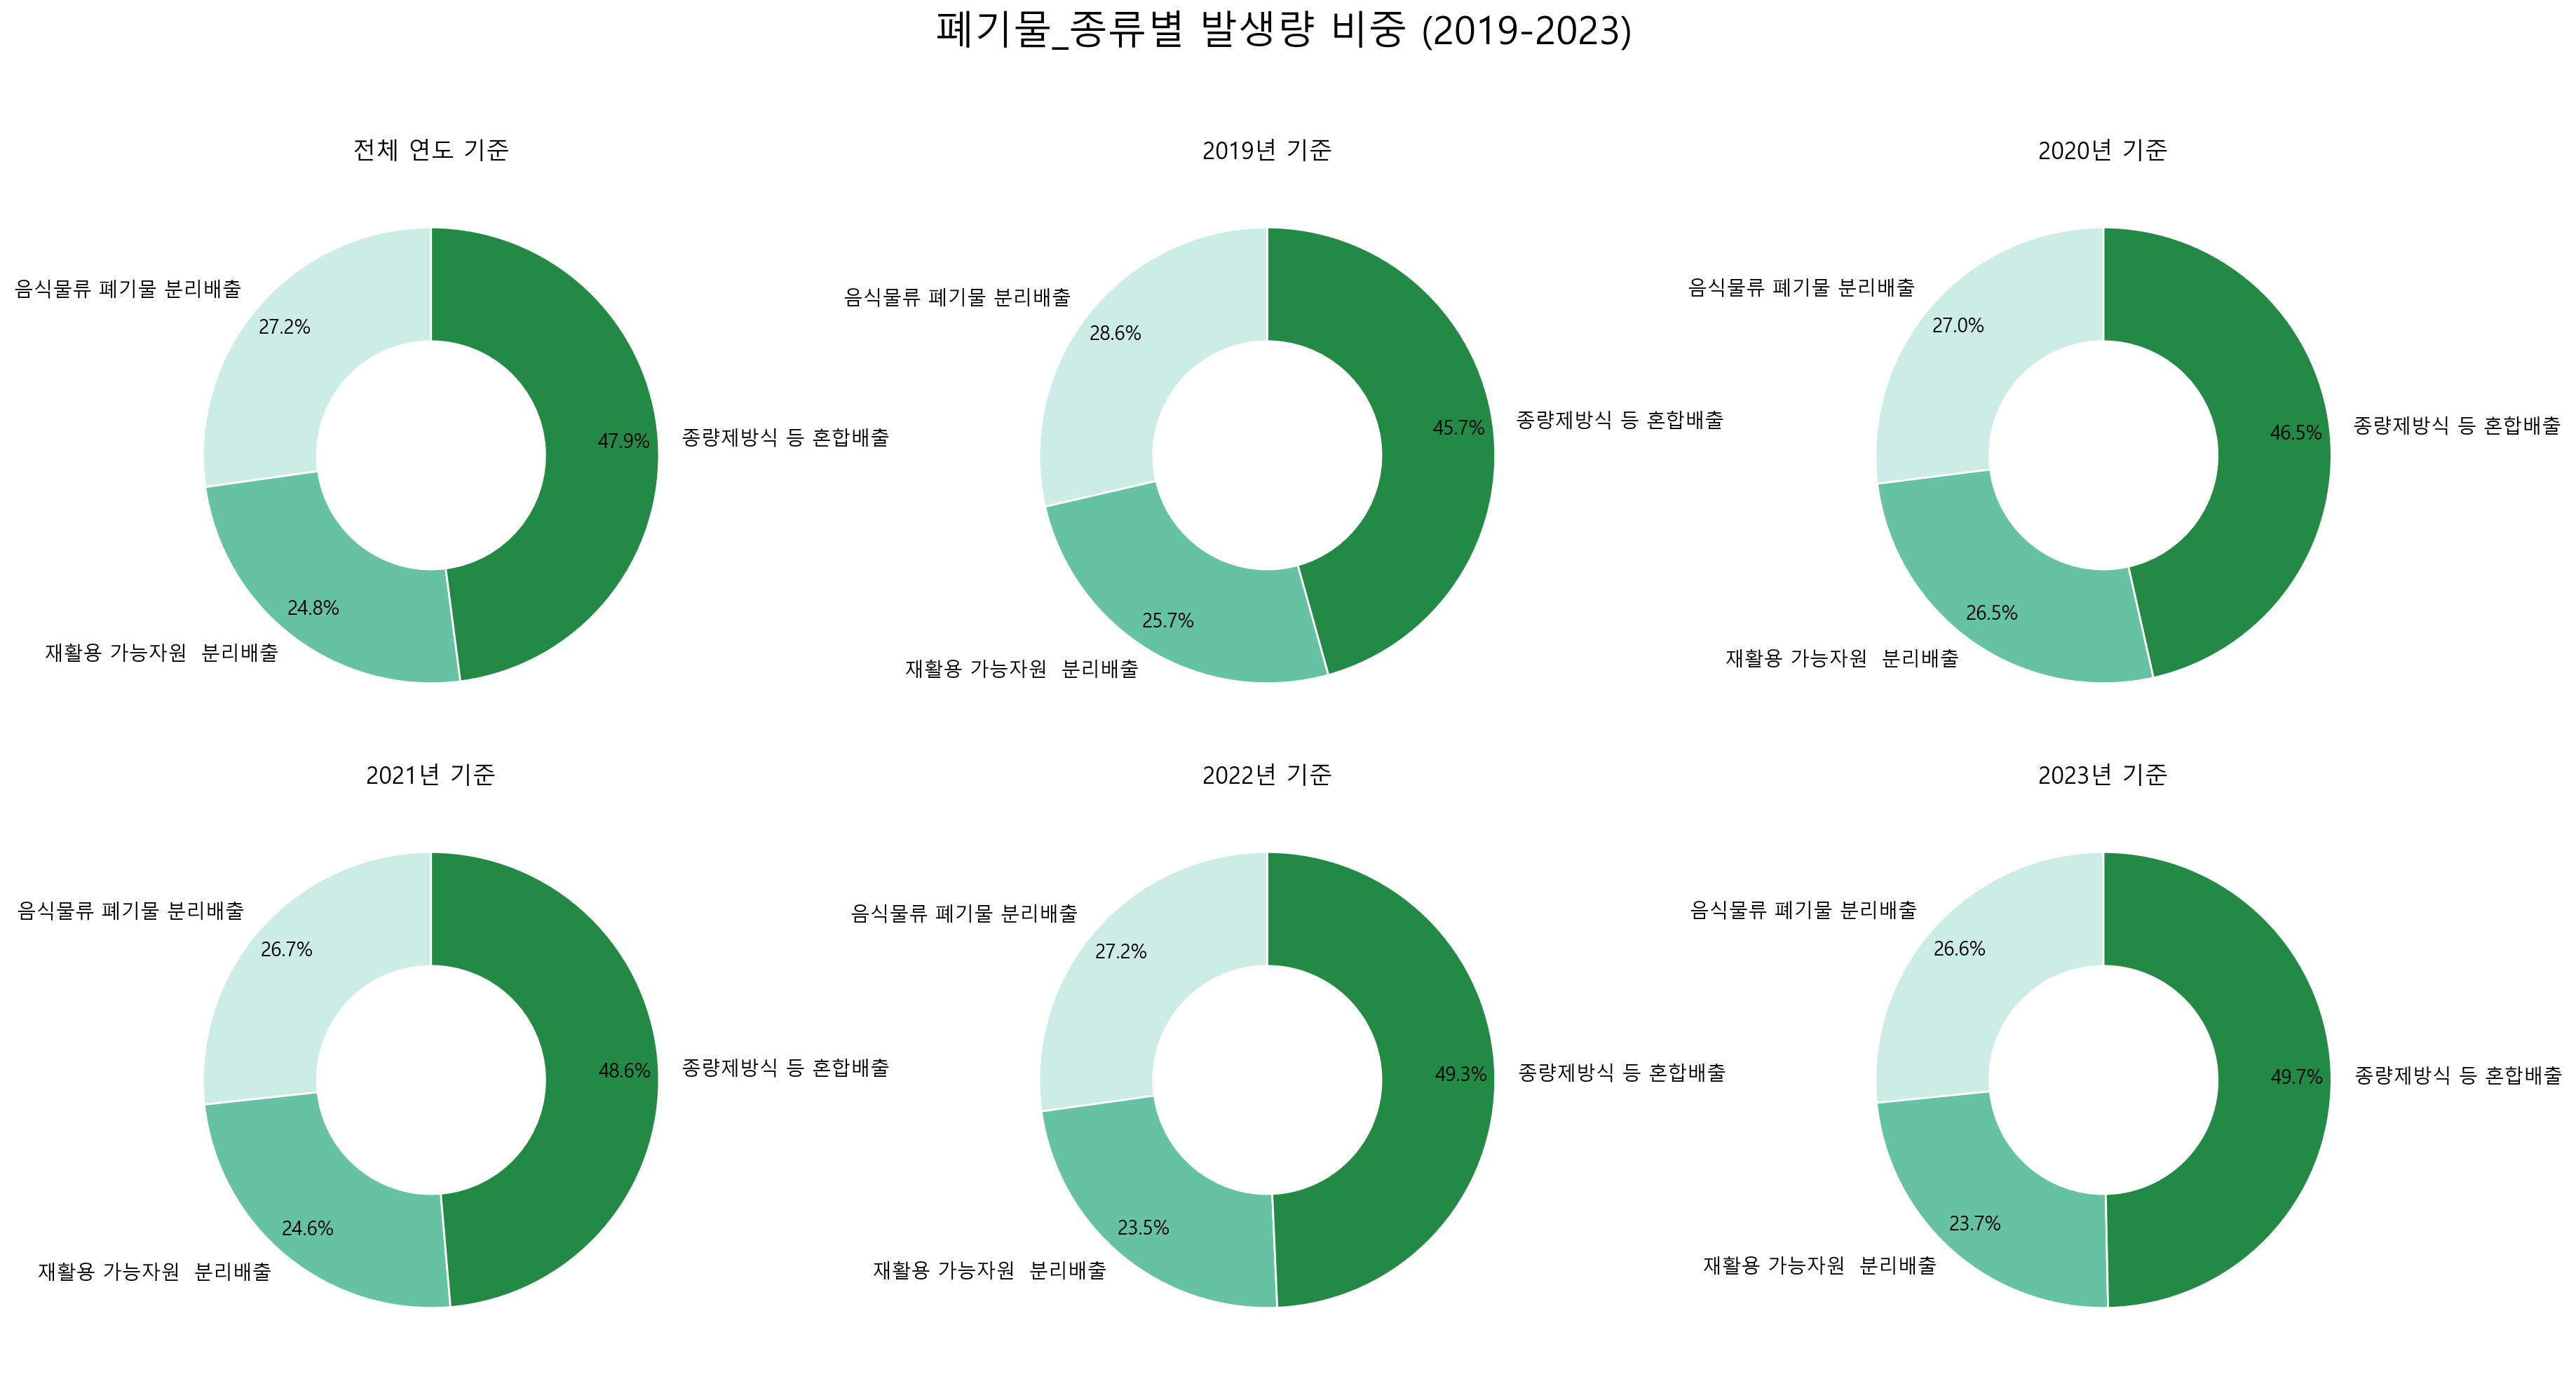

In [122]:
# 2행 3열 subplot으로 전체년도 + 각각 연도별 그래프 >> 이렇게 6개로 그릴거임
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

palette = sns.color_palette("BuGn", 3)

# 0번째 subplot: 전체 연도 통합
total_amount = waste["발생량"].sum()
cat_amount = waste.groupby("폐기물_종류")["발생량"].sum()
cat_amount_pct = (cat_amount / total_amount * 100).round(2)
print("전체 데이터에서 폐기물_종류별 발생량 비중 (%): ", cat_amount_pct)

axs[0].pie(
    cat_amount_pct.values,
    labels=cat_amount_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance=0.85,
    colors=palette,
    textprops={'fontsize': 10}
)
axs[0].set_title("전체 연도 기준")

# 연도별 pie chart
for i, year in enumerate(years):
    yearly_data = waste[waste["연도"] == year]
    yearly_total = yearly_data["발생량"].sum()
    yearly_cat = yearly_data.groupby("폐기물_종류")["발생량"].sum()
    yearly_cat_pct = (yearly_cat / yearly_total * 100).round(2)
#     print(f"전국 {year}년 폐기물_종류별 발생량 비중 (%): ", yearly_cat_pct)

    axs[i+1].pie(
        yearly_cat_pct.values,
        labels=yearly_cat_pct.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85,
        colors=palette,
        textprops={'fontsize': 10}
    )
    axs[i+1].set_title(f"{year}년 기준")
    
for ax in axs:
    ax.set_aspect("equal")

plt.suptitle("폐기물_종류별 발생량 비중 (2019-2023)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

부산광역시 폐기물_종류별 발생량 비중 (%):  폐기물_종류
음식물류 폐기물 분리배출     24.38
재활용 가능자원  분리배출    36.58
종량제방식 등 혼합배출      39.04
Name: 발생량, dtype: float64


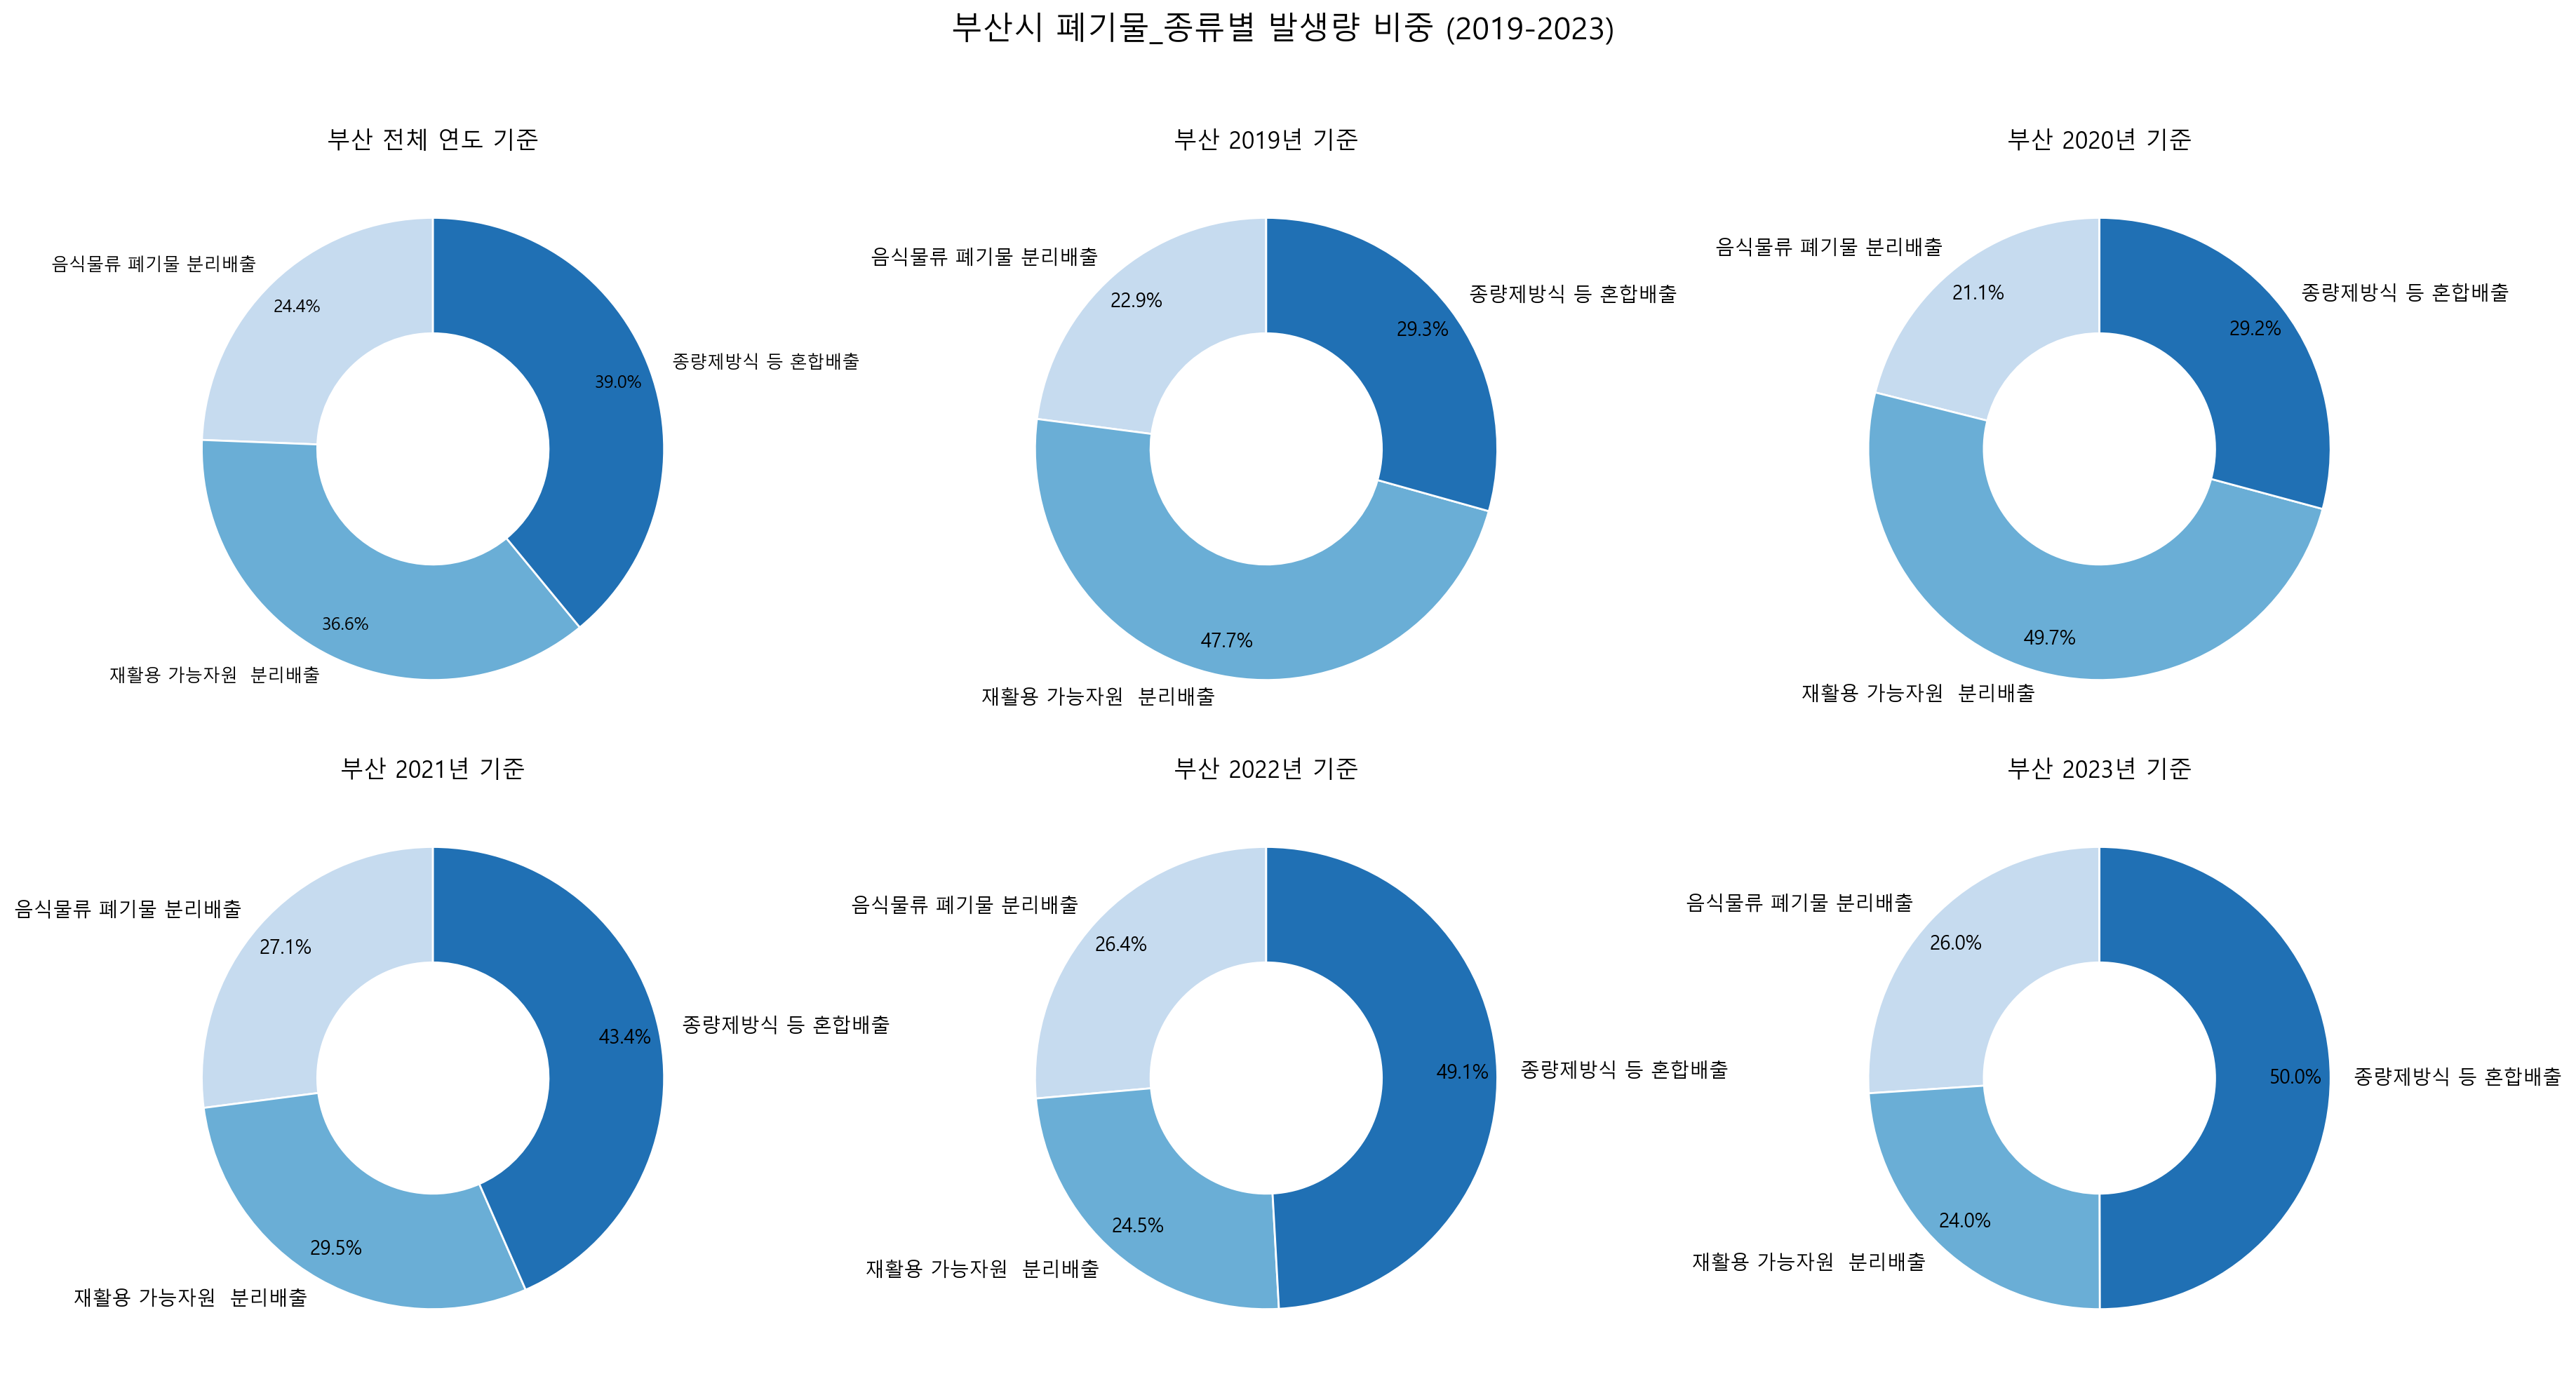

In [124]:
# 부산시만 적용
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

palette_busan = sns.color_palette("Blues", 3)

# 0번째 subplot: 전체 연도 통합
total_amount = waste_busan["발생량"].sum()
cat_amount = waste_busan.groupby("폐기물_종류")["발생량"].sum()
cat_amount_pct = (cat_amount / total_amount * 100).round(2)
print("부산광역시 폐기물_종류별 발생량 비중 (%): ", cat_amount_pct)

axs[0].pie(
    cat_amount_pct.values,
    labels=cat_amount_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance=0.85,
    colors=palette_busan,
    textprops={'fontsize': 9}
)
axs[0].set_title("부산 전체 연도 기준")

# 연도별 pie chart
for i, year in enumerate(years):
    yearly_data = waste_busan[waste_busan["연도"] == year]
    yearly_total = yearly_data["발생량"].sum()
    yearly_cat = yearly_data.groupby("폐기물_종류")["발생량"].sum()
    yearly_cat_pct = (yearly_cat / yearly_total * 100).round(2)
#     print(f"부산광역시 {year}년 폐기물_종류별 발생량 비중 (%): ", yearly_cat_pct)

    axs[i+1].pie(
        yearly_cat_pct.values,
        labels=yearly_cat_pct.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85,
        colors=palette_busan,
        textprops={'fontsize': 10}
    )
    axs[i+1].set_title(f"부산 {year}년 기준")

# 전체 레이아웃 정리
for ax in axs:
    ax.set_aspect("equal")

plt.suptitle("부산시 폐기물_종류별 발생량 비중 (2019-2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

<br>

### 02-2. 부산광역시 폐기물_종류별 발생량 비중 변화 (2019 → 2023)를 lineplot으로 시각화

In [125]:
# 연도 및 비중 저장용 리스트
data_pct = []

# 비율 계산 루프
for year in years:
    yearly_data = waste_busan[waste_busan["연도"] == year]
    yearly_total = yearly_data["발생량"].sum()
    yearly_cat = yearly_data.groupby("폐기물_종류")["발생량"].sum()
    yearly_cat_pct = (yearly_cat / yearly_total * 100).round(2)

    row = {
        "연도": year,
        "음식물류": yearly_cat_pct.get("음식물류 폐기물 분리배출", 0),
        "재활용 가능자원": yearly_cat_pct.get("재활용 가능자원  분리배출", 0),
        "종량제방식": yearly_cat_pct.get("종량제방식 등 혼합배출", 0)
    }
    data_pct.append(row)

busan_pct = pd.DataFrame(data_pct)
busan_pct

,연도,음식물류,재활용 가능자원,종량제방식
0,2019,22.93,47.73,29.34
1,2020,21.07,49.74,29.18
2,2021,27.06,29.51,43.43
3,2022,26.41,24.47,49.12
4,2023,26.05,23.98,49.97


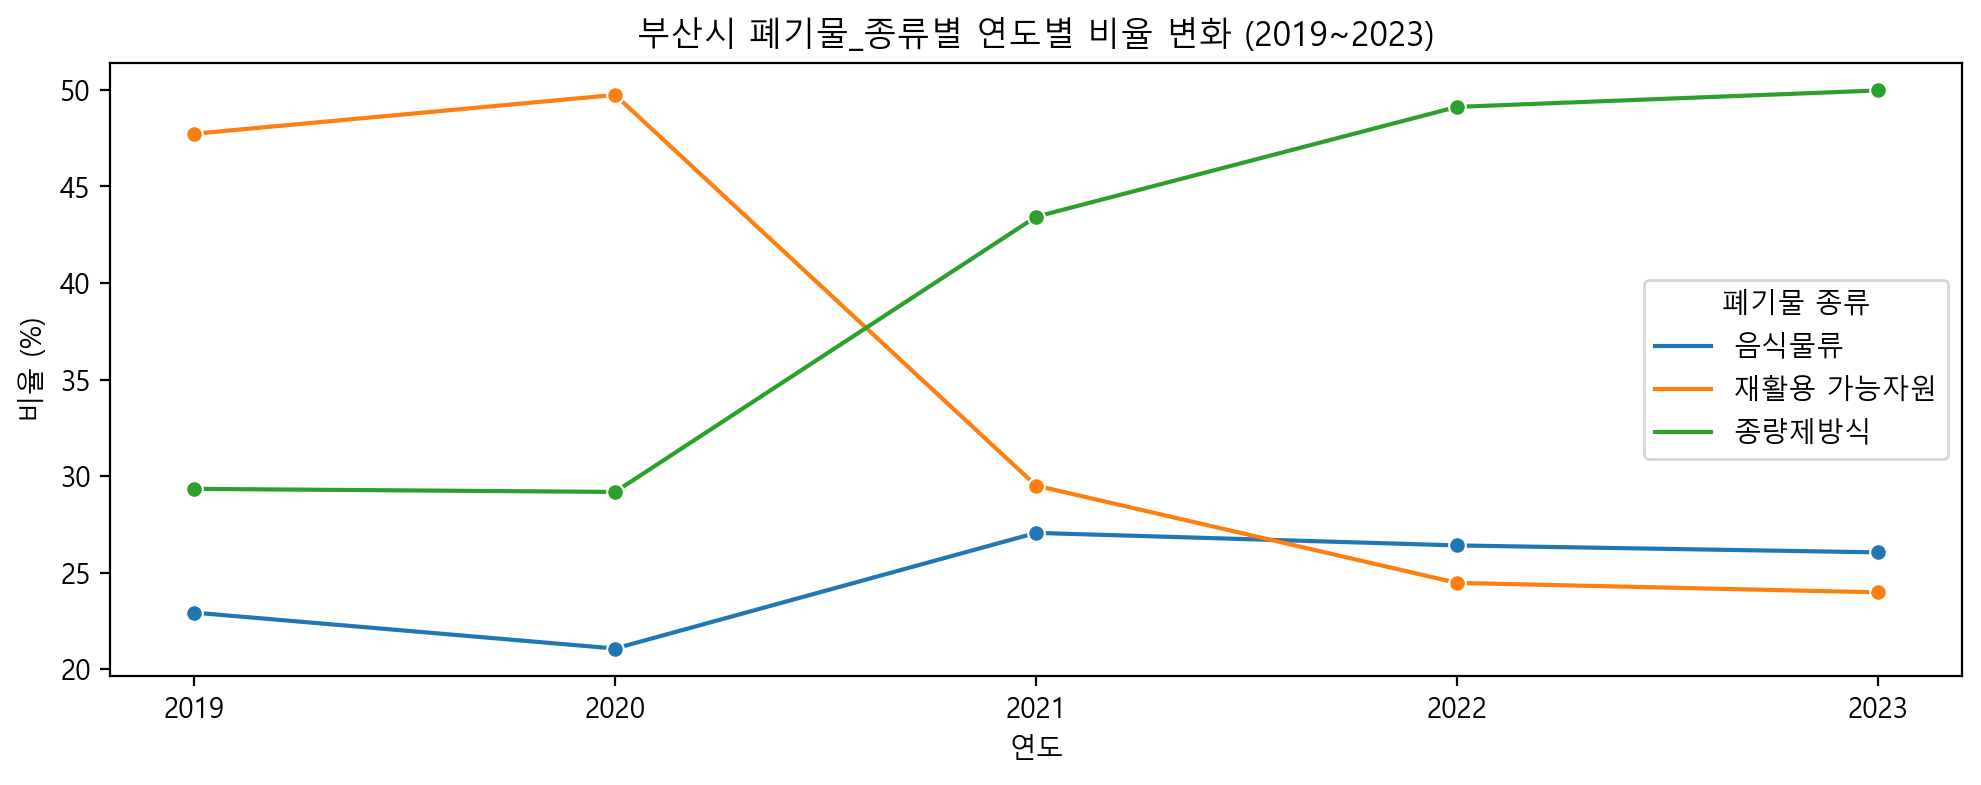

In [126]:
df_melted = busan_pct.melt(id_vars="연도", var_name="폐기물_종류", value_name="비율")

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_melted, x="연도", y="비율", hue="폐기물_종류", marker="o")
plt.title("부산시 폐기물_종류별 연도별 비율 변화 (2019~2023)", fontsize=12)
plt.ylabel("비율 (%)")
plt.xticks(busan_pct["연도"])
plt.legend(title="폐기물 종류")
plt.tight_layout()

<br>

---
### 02-3. 전국 및 부산의 폐기물 배출 방식 변화 정리 (2019~2023)

### 🐱‍🏍 전국 (부산 포함)
- `종량제방식 등 혼합배출` 비중 증가
    - 2019년: 45.7% → 2023년: 49.7%
    - 전체 폐기물의 절반 가까이가 종량제로 배출되는 추세
- `재활용 가능자원 분리배출` 비중 감소
    - 2019년: 25.7% → 2023년: 23.7%
    - 완만한 감소세를 보이며, 분리배출이 줄어드는 조짐

<br>

### 🐱‍🚀부산
- **`종량제방식 등 혼합배출` 비중의 급격한 증가**
    - 2019년: 29.3% → 2023년: 49.97%
    - 전국보다 가파르게 상승
    - 2021년부터 **재활용 < 종량제**로 역전
   
- **`재활용 가능자원 분리배출` 비중의 급감**
    - 2019년 47.7% → 2023년 23.9%
    - 절반 수준 이하로 급락, 전국보다 하락폭이 큼  
    
⇒ 재활용 대상 폐기물이 **종량제에 섞여 배출**되고 있을 가능성  
⇒ 사람들의 **재활용 참여율 감소** 또는 **분리배출 시스템 미비** 가능성  
⇒ 결과적으로 **재활용률 하락 + 분류 인력 증가 + 환경 부담 증가**  

<br>

위 전국 기준 그래프에서는 `종량제 방식`-`재활용`이 그래도 나름 일정한 비중을 유지하고 있는데 부산만 극단적으로 양이 변한 건 수상하다  
재활용의 비중을 다시 늘려야 하지 않나?  

종량제 방식에서 **[폐기물_종류1]가 전국에 비해 부산에만 재활용이 많다**면, 사람들이 **재활용할 것도 종량제에 버린다는 뜻**일 거 같다  

<br>

이를 확실히 하기 위해  
#### → `종량제방식`과 `재활용 가능자원` 내의 폐기물_종류1 종류별 비중을 비교하고 재활용 가능한 품목이 실제로 종량제에 얼마나 포함돼 있는지 확인

<br><br>

---
## 03. [폐기물_종류1] 중분류별 비중 확인하기


<br>

### 03-1. 파이차트로 전국과 부산 [폐기물_종류1] 비중 시각화

전체 데이터에서 폐기물_종류별 발생량 비중 (%):  폐기물_종류1
가연성          85.27
건설폐재류         2.87
기타(배출불명등)     0.87
불연성          10.99
Name: 발생량, dtype: float64


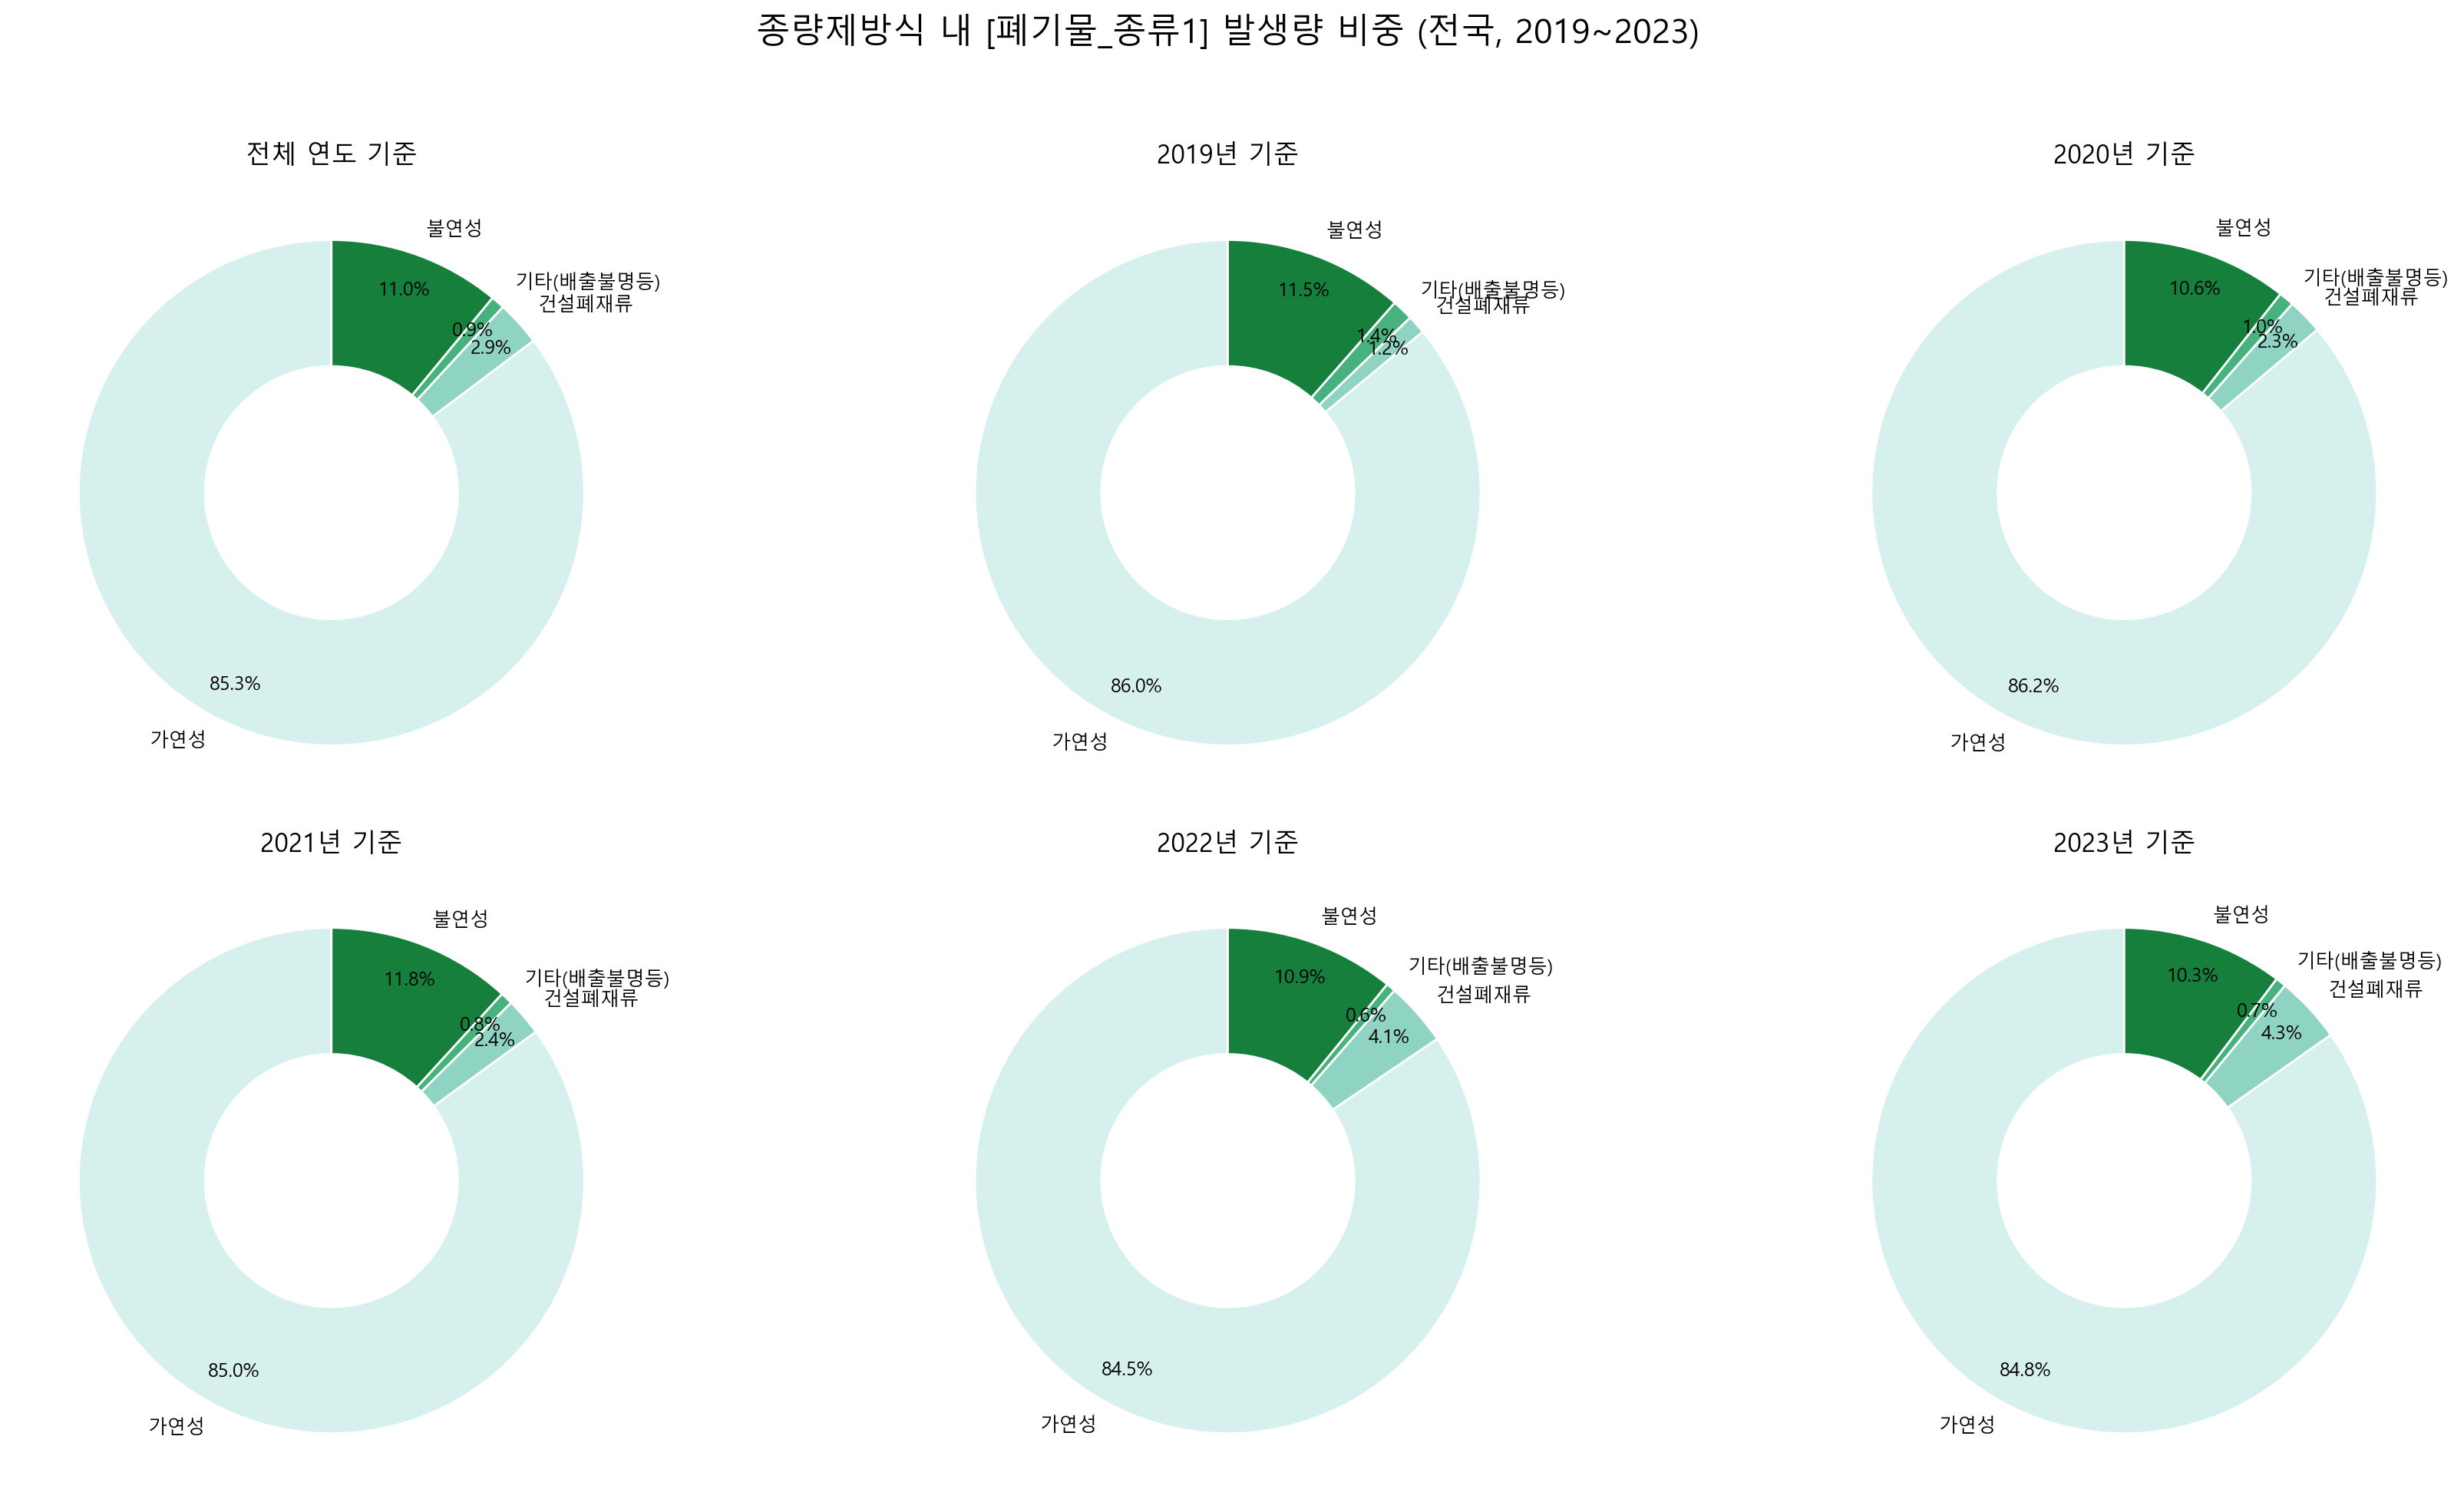

In [128]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# 색상 팔레트 (종량제방식 폐기물_종류1의 수에 맞춰 동적 적용)
# 전체에서 고유 종류 개수 확인
all_jongryeong = waste_wo_food[waste_wo_food["폐기물_종류"] == "종량제방식 등 혼합배출"]
unique_types = all_jongryeong["폐기물_종류1"].dropna().unique()
palette = sns.color_palette("BuGn", len(unique_types))

# 0번째 subplot: 전체 연도 통합
type_amount = all_jongryeong.groupby("폐기물_종류1")["발생량"].sum()
type_amount_pct = (type_amount / type_amount.sum() * 100).round(2)
print("전체 데이터에서 폐기물_종류별 발생량 비중 (%): ", type_amount_pct)

axs[0].pie(
    type_amount_pct.values,
    labels=type_amount_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance=0.85,
    colors=palette,
    textprops={'fontsize': 9}
)
axs[0].set_title("전체 연도 기준")

# 연도별 pie chart
for i, year in enumerate(years):
    yearly_data = waste_wo_food[
        (waste_wo_food["연도"] == year) &
        (waste_wo_food["폐기물_종류"] == "종량제방식 등 혼합배출")
    ]
    yearly_type = yearly_data.groupby("폐기물_종류1")["발생량"].sum()
    yearly_type_pct = (yearly_type / yearly_type.sum() * 100).round(2)
#     print(f"전국 {year}년 [폐기물_종류1]별 발생량 비중 (%): ", yearly_type_pct)

    axs[i+1].pie(
        yearly_type_pct.values,
        labels=yearly_type_pct.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85,
        colors=palette,
        textprops={'fontsize': 9}
    )
    axs[i+1].set_title(f"{year}년 기준")

for ax in axs:
    ax.set_aspect("equal")

plt.suptitle("종량제방식 내 [폐기물_종류1] 발생량 비중 (전국, 2019~2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

---

가연성이 많아서 소각이 많은건가? [mj-eda](https://github.com/kimsang0220/Busan_Big_Data/blob/main/NMJ/4%EC%B0%A8_EDA_%EC%93%B0%EB%A0%88%EA%B8%B0%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb)에서 시각화 한 거에서 가져옴

소각 vs. 매립을 결정하는 기준이 쓰레기의 종류에 따라서인 거 같음

### 전국 연도별 `종량제방식` 처리방법 구분 (민주 깃허브 참고)

<img src="./img/전국_년도별_종량제방식_처리방법_구분.png" width="50%">

---

<br>

우선 부산시도 해당이 되는지 확인

부산시 전체 종량제방식 내 폐기물_종류1 비중 (%):
 폐기물_종류1
가연성          74.82
건설폐재류        11.28
기타(배출불명등)     0.38
불연성          13.52
Name: 발생량, dtype: float64


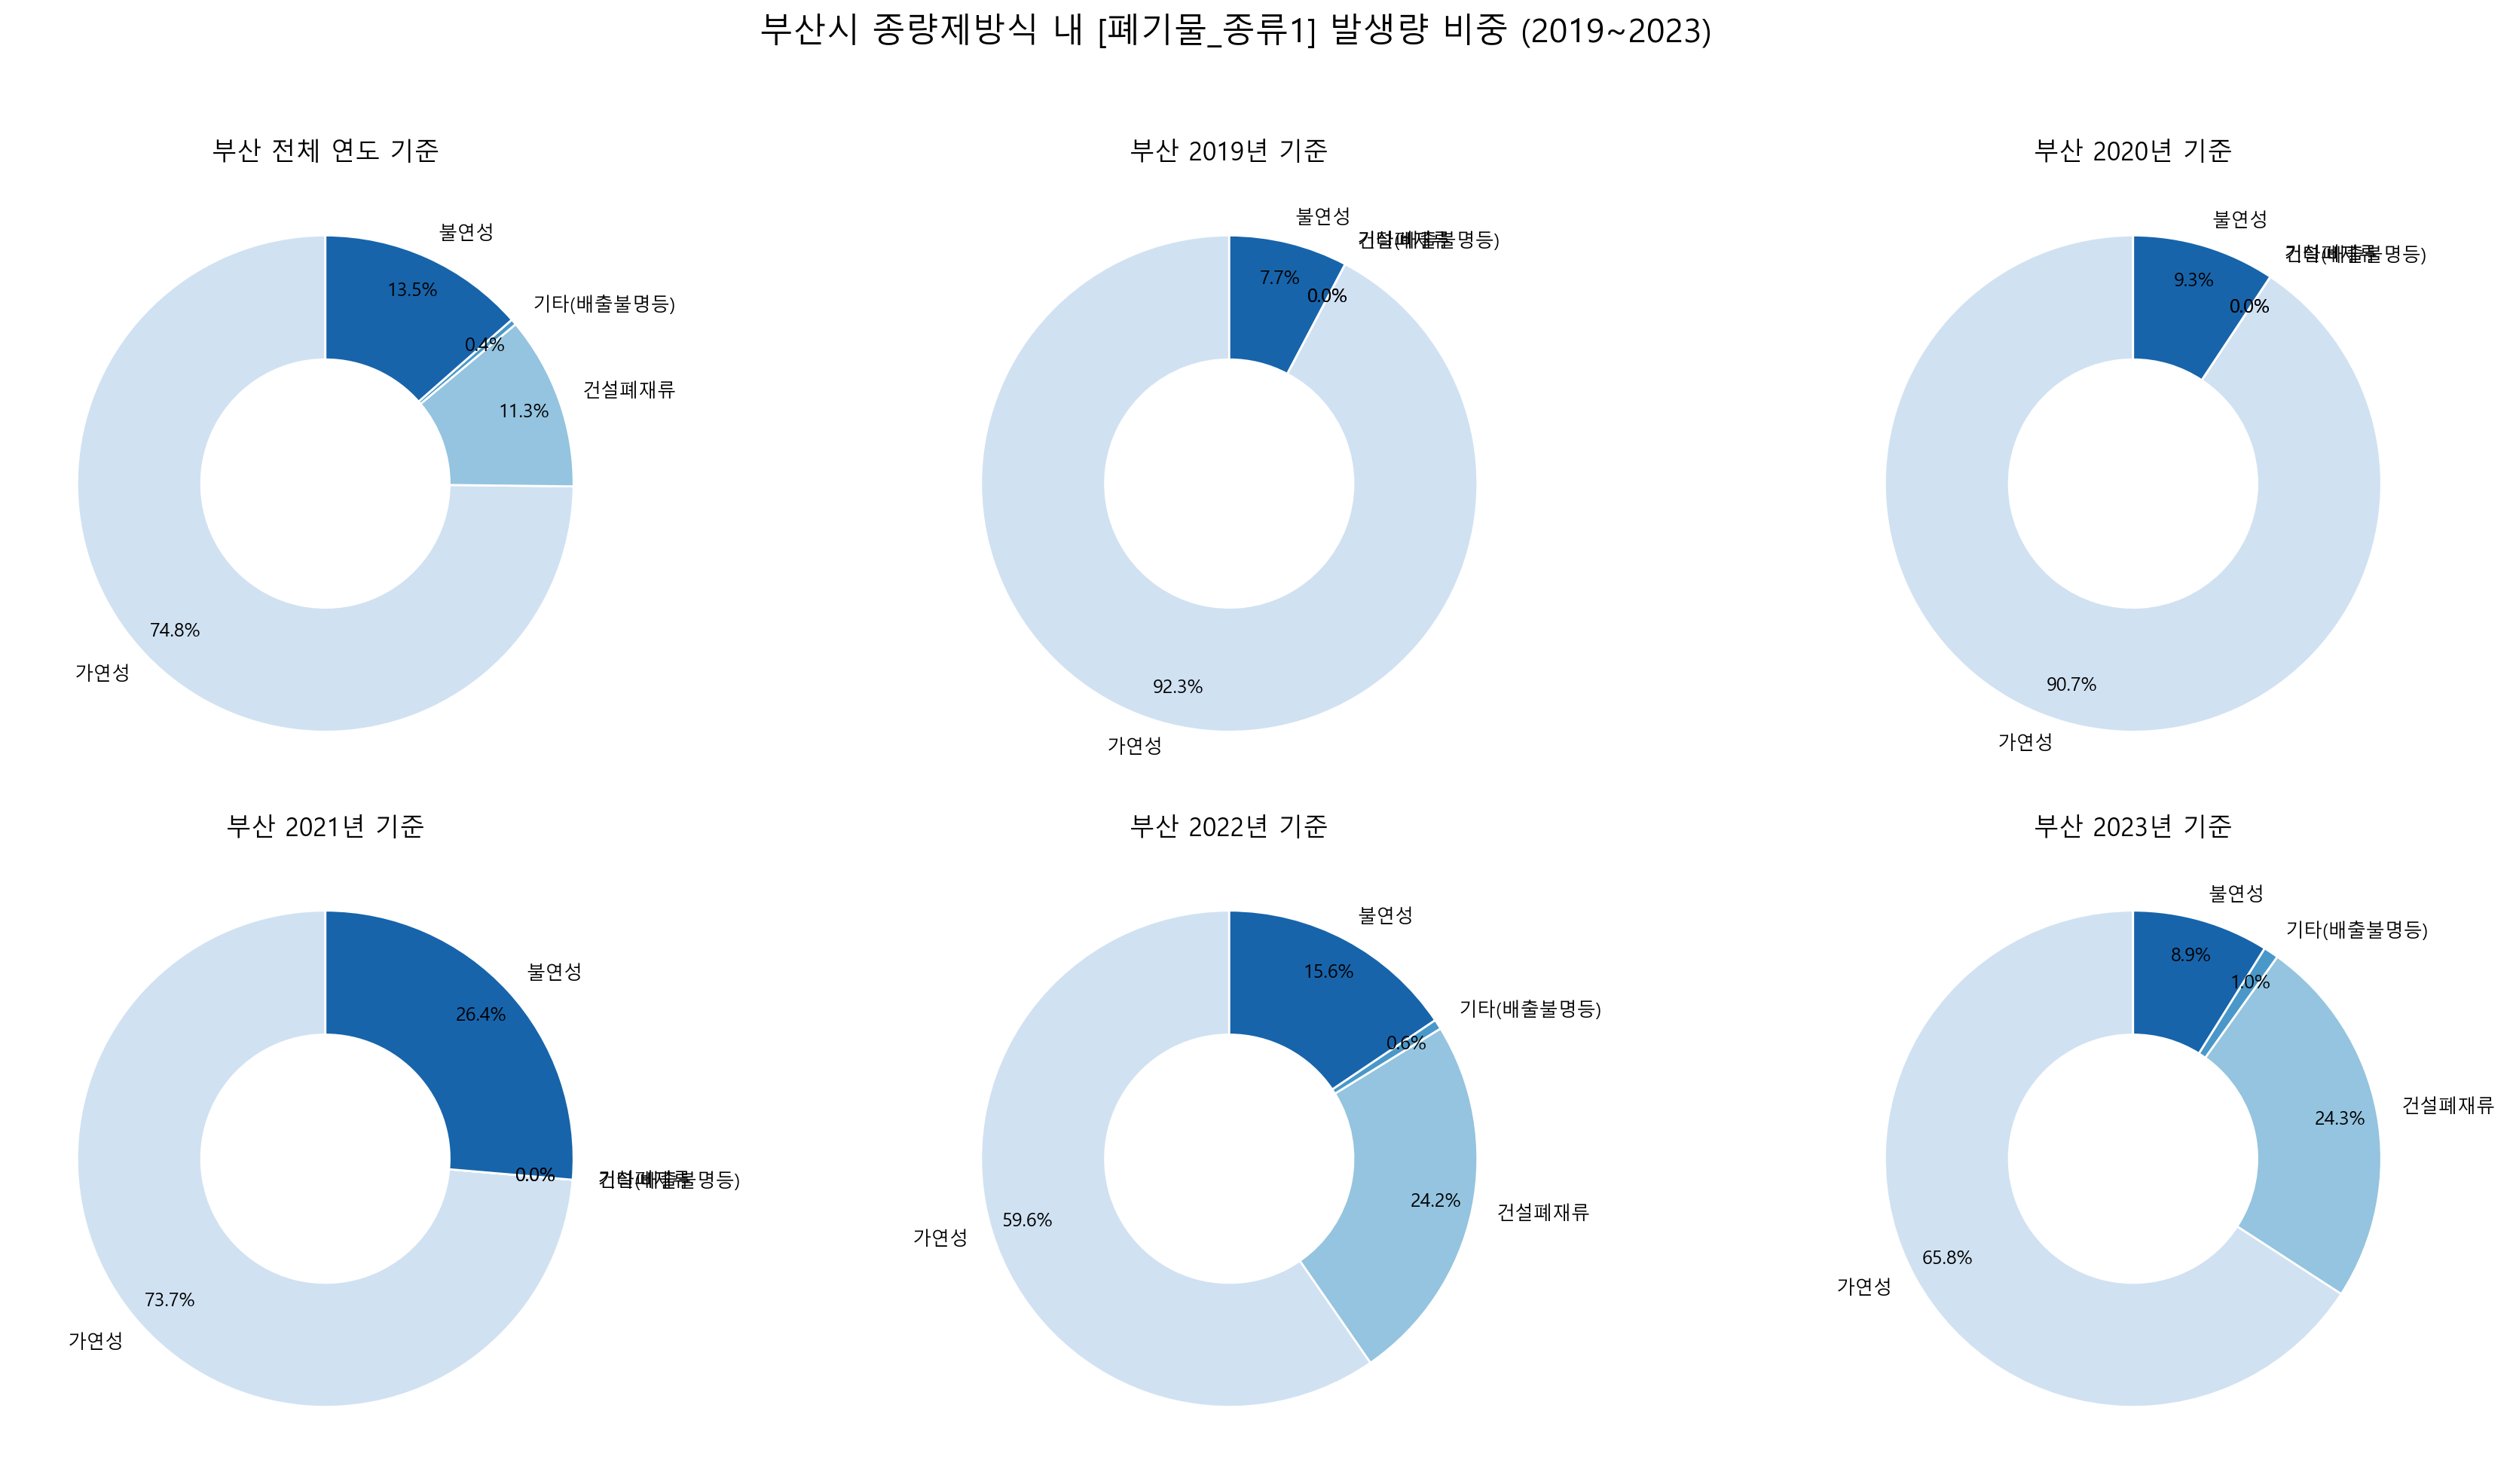

In [130]:
# 부산시 + 음식물류 제외된 데이터
waste_busan_wo_food = waste[(waste["시도"] == "부산") & (waste["폐기물_종류"] != "음식물류 폐기물 분리배출")]

# 2행 3열 subplot 생성
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

busan_jongryeong = waste_busan_wo_food[waste_busan_wo_food["폐기물_종류"] == "종량제방식 등 혼합배출"]
unique_types = busan_jongryeong["폐기물_종류1"].dropna().unique()
palette = sns.color_palette("Blues", len(unique_types))

# 0번째 subplot: 전체 연도 통합
type_amount = busan_jongryeong.groupby("폐기물_종류1")["발생량"].sum()
type_amount_pct = (type_amount / type_amount.sum() * 100).round(2)
print("부산시 전체 종량제방식 내 폐기물_종류1 비중 (%):\n", type_amount_pct)

axs[0].pie(
    type_amount_pct.values,
    labels=type_amount_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance=0.85,
    colors=palette,
    textprops={'fontsize': 9}
)
axs[0].set_title("부산 전체 연도 기준")

# 연도별 pie chart
for i, year in enumerate(years):
    yearly_data = waste_busan_wo_food[
        (waste_busan_wo_food["연도"] == year) &
        (waste_busan_wo_food["폐기물_종류"] == "종량제방식 등 혼합배출")
    ]
    yearly_type = yearly_data.groupby("폐기물_종류1")["발생량"].sum()
    yearly_type_pct = (yearly_type / yearly_type.sum() * 100).round(2)
#     print(f"부산광역시 {year}년 [폐기물_종류1]별 발생량 비중 (%): ", yearly_type_pct)

    axs[i+1].pie(
        yearly_type_pct.values,
        labels=yearly_type_pct.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85,
        colors=palette,
        textprops={'fontsize': 9}
    )
    axs[i+1].set_title(f"부산 {year}년 기준")

# 시각 정리
for ax in axs:
    ax.set_aspect("equal")

plt.suptitle("부산시 종량제방식 내 [폐기물_종류1] 발생량 비중 (2019~2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [102]:
# 연도별 비중 저장
busan_type_pct_list = []
years_full = ["전체"] + years

for year in years_full:
    if year == "전체":
        data = busan_jongryeong
    else:
        data = busan_jongryeong[busan_jongryeong["연도"] == year]
    
    type_group = data.groupby("폐기물_종류1")["발생량"].sum()
    type_pct = (type_group / type_group.sum() * 100).round(2)

    row = {
        "연도": year,
        "가연성": type_pct.get("가연성", 0),
        "불연성": type_pct.get("불연성", 0),
        "건설폐재류": type_pct.get("건설폐재류", 0),
        "기타(배출불명등)": type_pct.get("기타(배출불명등)", 0)
    }
    busan_type_pct_list.append(row)

df_busan_type_pct = pd.DataFrame(busan_type_pct_list)
df_busan_type_pct

,연도,가연성,불연성,건설폐재류,기타(배출불명등)
0,전체,74.82,13.52,11.28,0.38
1,2019,92.27,7.73,0.00,0.00
2,2020,90.68,9.32,0.00,0.00
3,2021,73.65,26.35,0.00,0.00
4,2022,59.64,15.57,24.16,0.64
5,2023,65.83,8.89,24.30,0.98


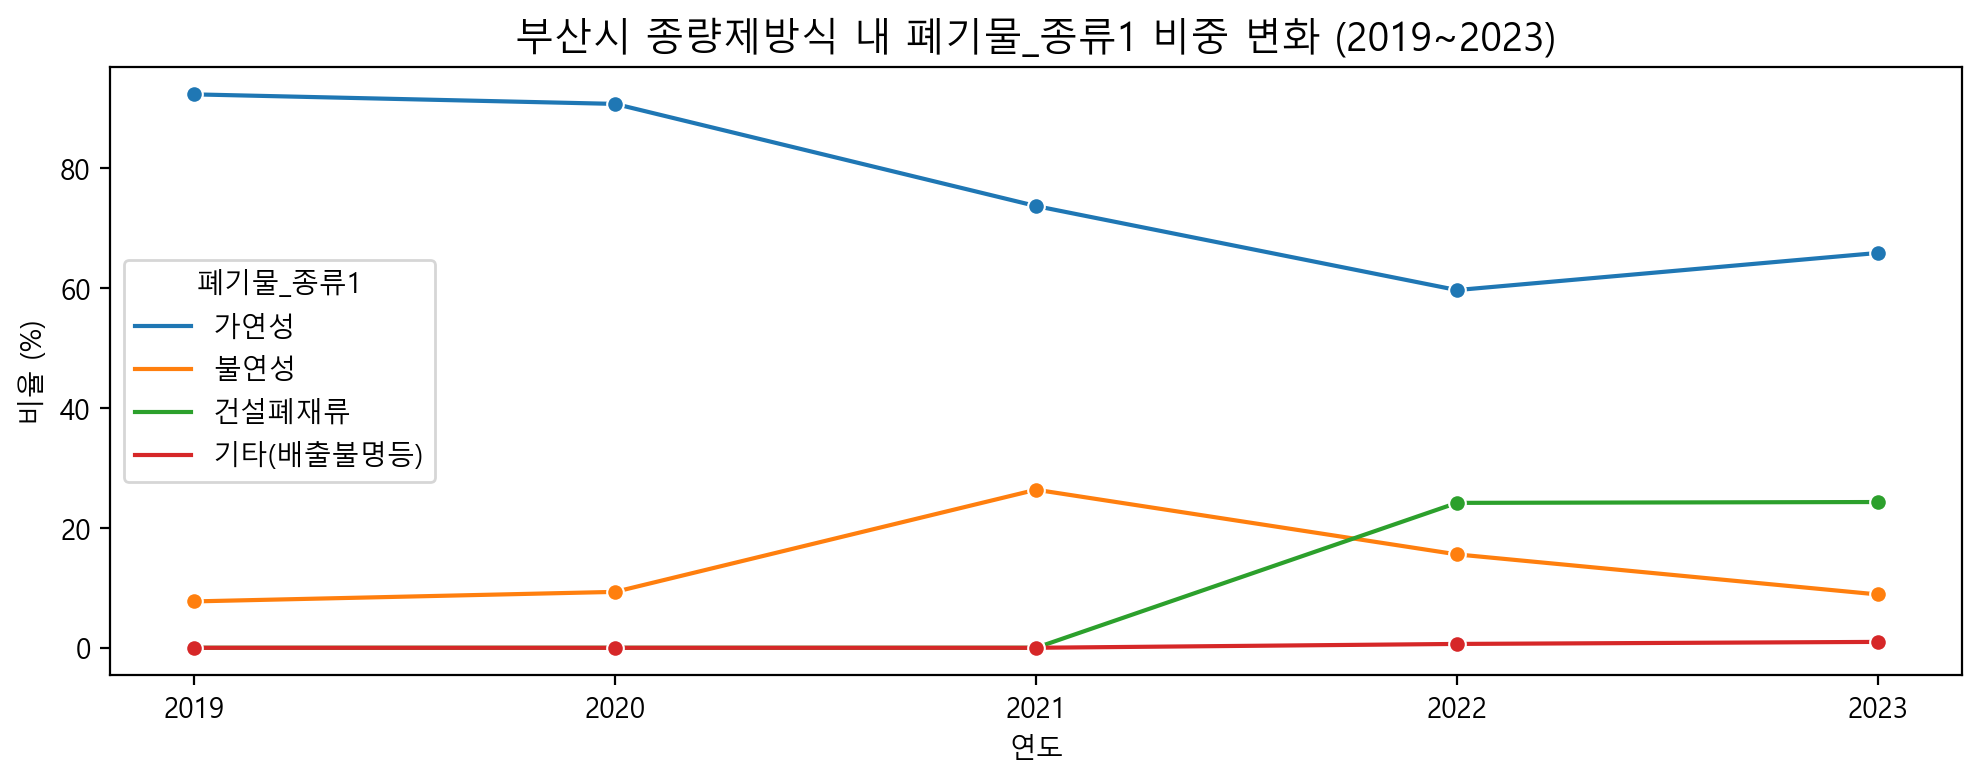

In [106]:
# "전체" 제외하고 숫자 연도만 시각화
df_line = df_busan_type_pct[df_busan_type_pct["연도"] != "전체"]

# Long-form 변환
df_melted = df_line.melt(id_vars="연도", var_name="폐기물_종류1", value_name="비율")

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_melted, x="연도", y="비율", hue="폐기물_종류1", marker="o")
plt.title("부산시 종량제방식 내 폐기물_종류1 비중 변화 (2019~2023)", fontsize=14)
plt.ylabel("비율 (%)")
plt.xticks(df_line["연도"].astype(int))
plt.legend(title="폐기물_종류1")
plt.tight_layout()

<br>

---
### 03-2. 전국 및 부산의 폐기물_종류1의 비중 변화 정리 (2019~2023)

### 🐱‍🏍 전국 (부산 포함)
- `가연성`이 전체의 약 85%로 압도적이며 5년간 큰 변화 없음
- `불연성`은 10~12% 사이에서 유지중임
- `건설폐재류`는 최근(2022~2023)에 소폭 증가 

<br>

### 🐱‍🚀부산
- 2019~2020년까지는 가연성 비중이 90% 이상 → **전국보다도 높음**
- 2021년부터 급격한 변화 발생:
    - 불연성 비중이 26%까지 올라감 (2021)
    - 건설폐재류가 2022~2023년 급증 (24%대 진입)
    
⇒ `가연성`의 비중은 하락하고 있으나 여전히 큰 비중을 차지함  
⇒ 부산에서 `건설폐재류`의 급증은 2021년 전까지  **측정을 따로 안 하거나** (0.0이었으니까), 아니면 **분리배출 정책이 바뀌어서** `건설폐재류`에도 적용된 거일수도 있고~

<br><br>

---
### 03-2. 부산시의 [폐기물_종류1]이 각각 어떻게(재활용/소각/매립/기타) 처리되고 있는지 확인하기 위한 시각화

In [131]:
# 부산시 종량제 방식 데이터
waste_busan_jong = waste[
    (waste["시도"] == "부산") &
    (waste["폐기물_종류"] == "종량제방식 등 혼합배출")
]

In [136]:
# 처리방법별 합계 구하기 (전체 연도 기준)
grouped_all = waste_busan_jong.groupby("폐기물_종류1")[["재활용", "소각", "매립", "기타"]].sum().round(2)
grouped_all["총합"] = grouped_all.sum(axis=1)
grouped_all = grouped_all.sort_values("총합", ascending=False).drop(columns="총합")

grouped

,재활용,소각,매립,기타,총합
폐기물_종류1,,,,,
가연성,747803.3,493179.2,148398.0,338.1,1389718.6
불연성,37787.9,70755.5,142553.9,0.0,251097.3
건설폐재류,193838.6,1553.5,13700.7,406.5,209499.3
기타(배출불명등),4069.9,1352.4,1566.4,0.0,6988.7


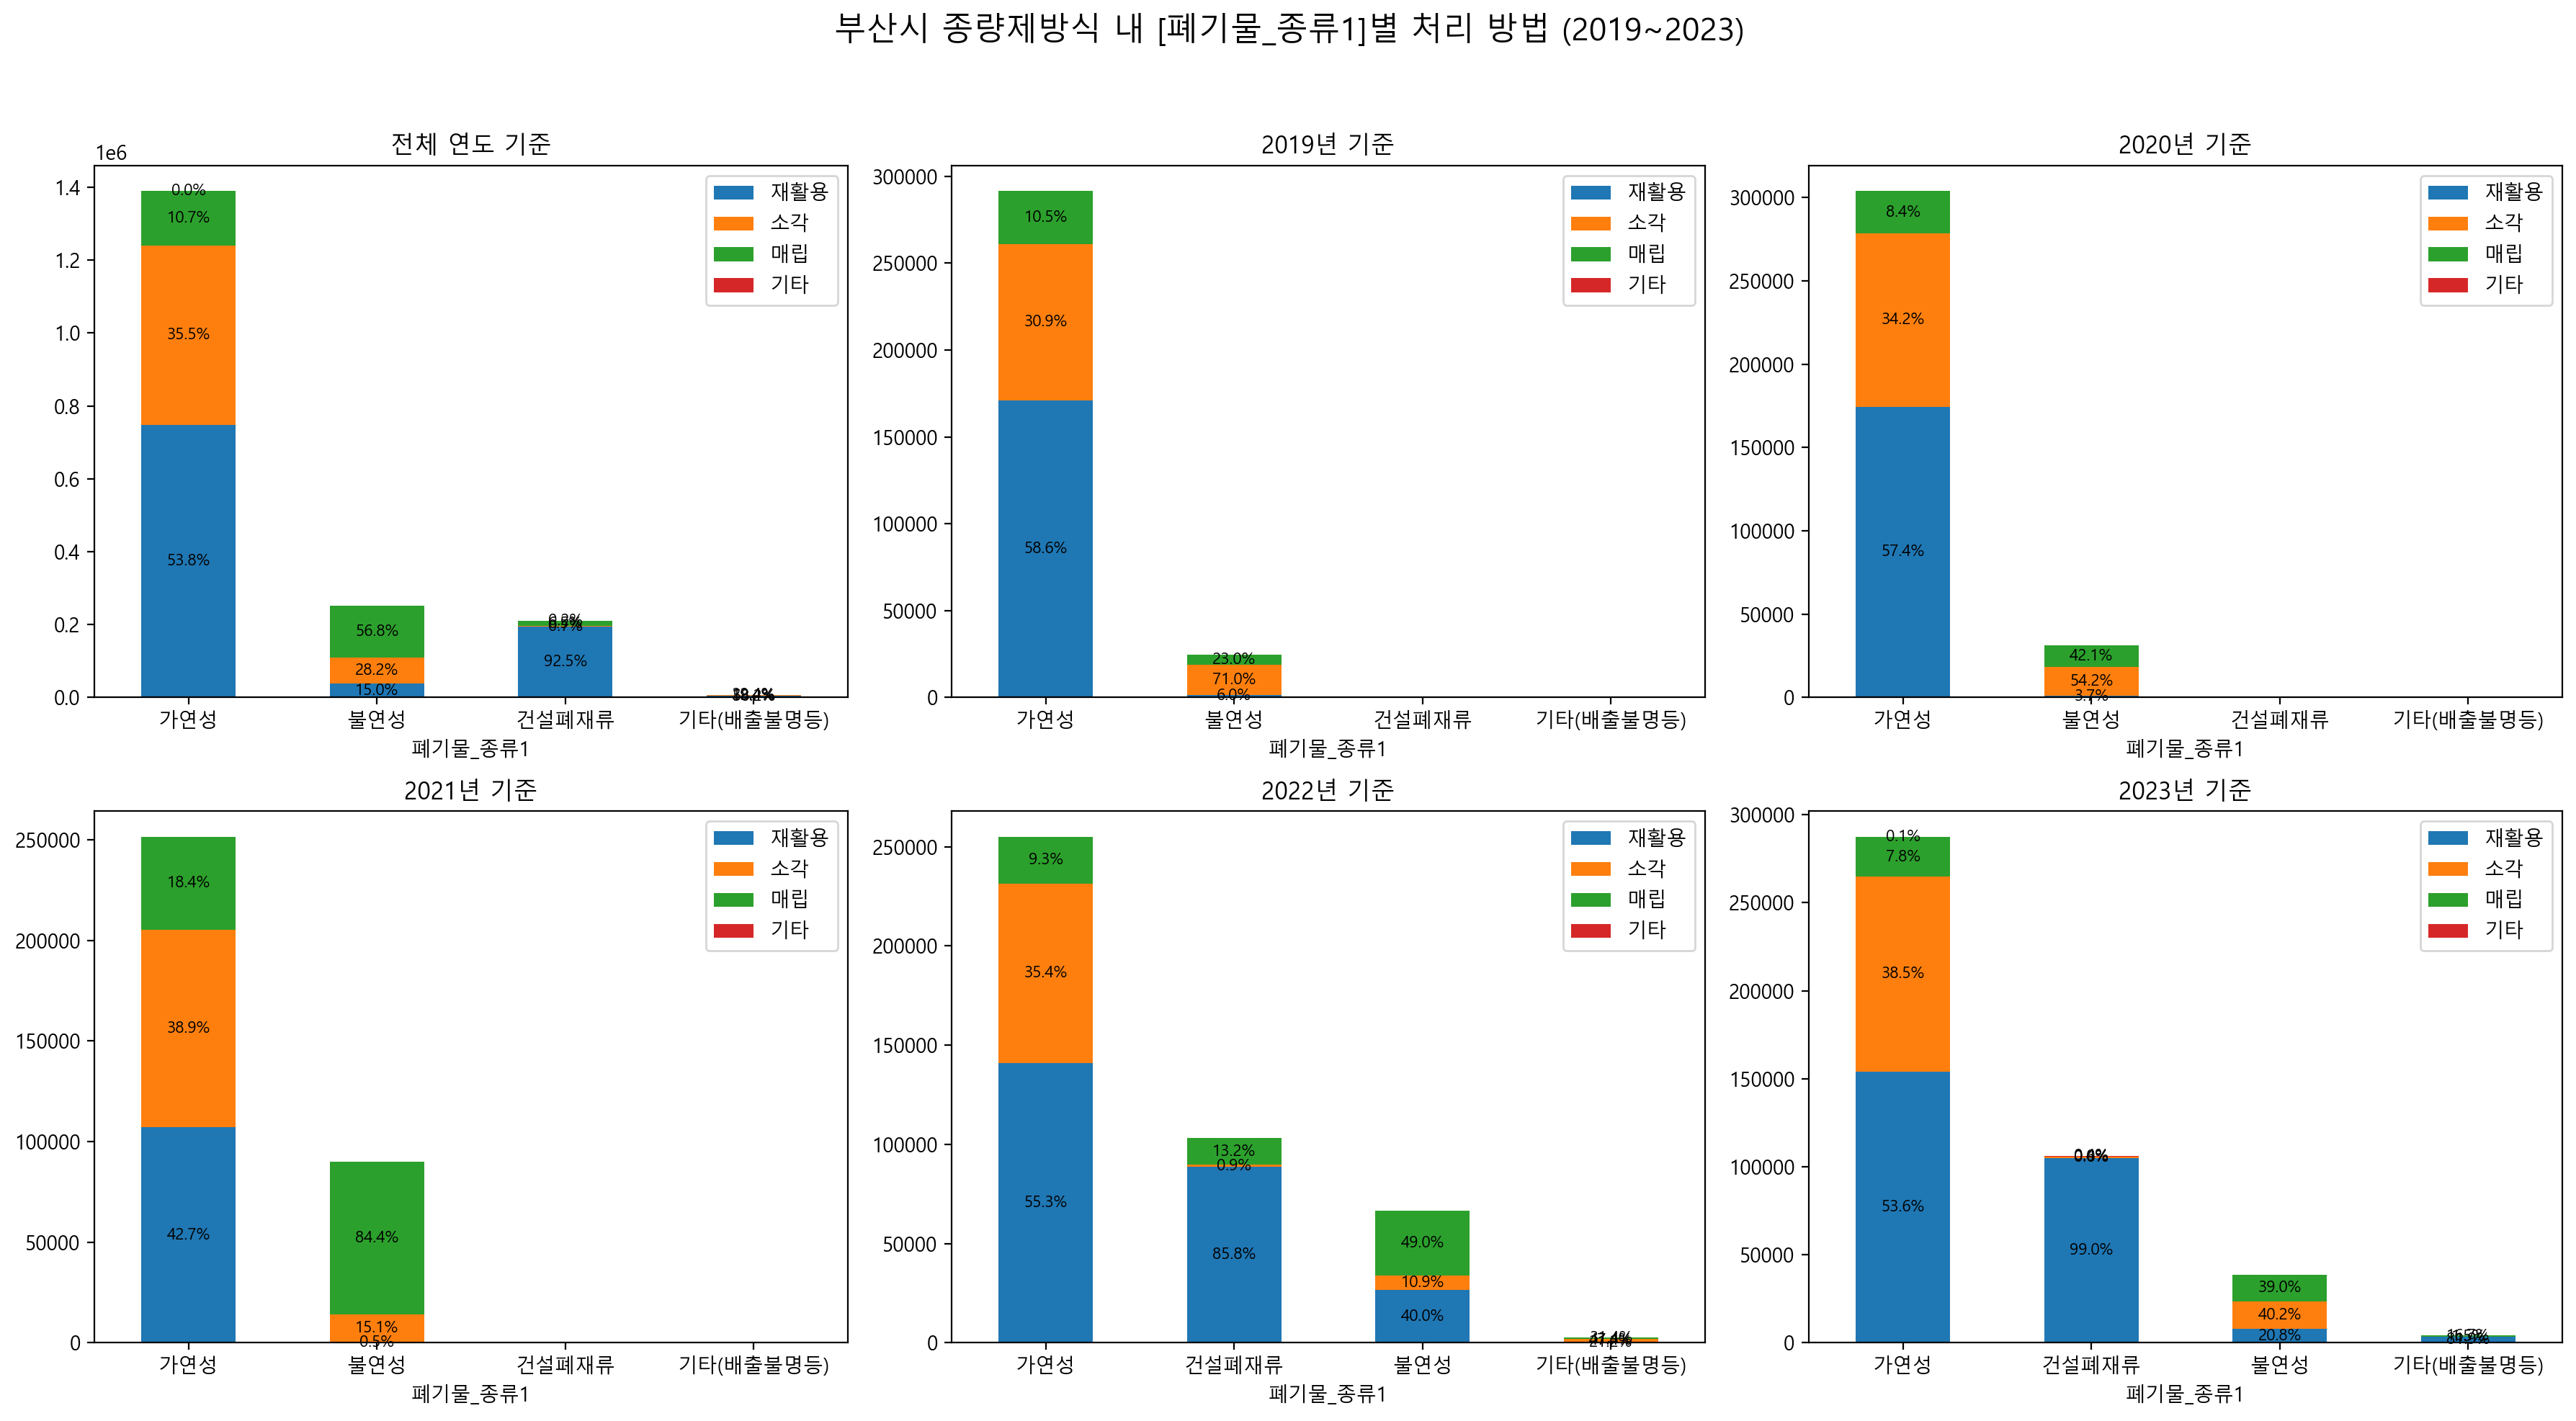

In [151]:
def add_percentage_labels(ax, df):
    totals = df.sum(axis=1)
    for idx, row in enumerate(df.itertuples(index=False)):
        bottom = 0
        for val, label in zip(row, df.columns):
            height = val
            pct = height / totals[idx] * 100 if totals[idx] else 0
            if height > 0:
                ax.text(idx, bottom + height / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8)
                bottom += height

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

grouped_all.plot(kind="bar", stacked=True, ax=axs[0])
axs[0].set_title("전체 연도 기준")
axs[0].tick_params(axis='x', rotation=0)
add_percentage_labels(axs[0], grouped_all)

for i, year in enumerate([2019, 2020, 2021, 2022, 2023]):
    df_year = waste_busan_jong[waste_busan_jong["연도"] == year]
    grouped = df_year.groupby("폐기물_종류1")[["재활용", "소각", "매립", "기타"]].sum().round(2)
    if not grouped.empty:
        grouped["총합"] = grouped.sum(axis=1)
        grouped = grouped.sort_values("총합", ascending=False).drop(columns="총합")
        grouped.plot(kind="bar", stacked=True, ax=axs[i+1])
        axs[i+1].set_title(f"{year}년 기준")
        axs[i+1].tick_params(axis='x', rotation=0)
        add_percentage_labels(axs[i+1], grouped)

plt.suptitle("부산시 종량제방식 내 [폐기물_종류1]별 처리 방법 (2019~2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

<br>

### 🐱‍🏍여기까지 정리
- **가연성 폐기물**
    - **재활용량이 소각·매립보다 항상 많음**
    - 동시에 **소각, 매립도 병행**되고 있음 (약 40%) → 이 중 일부는 분리만 잘 되면 재활용 가능했을 수도 있음
    - 가연성 중 재활용이 가능한 자원(폐지류, 합성수지류 등)이 종량제 혼합 상태로 버려져, 결국 **일부만 재활용되고 나머지는 소각·매립되는 문제 구조가 있을 수 있다..!**
    - → 이건 [폐기물_종류2]을 봐야 알 수 있을 듯 함
    
<br>

- **불연성 폐기물**
    - 재활용 비율 낮고, 소각과 매립이 거의 전부
    - 2021년엔 매립량이 급증
    - 현재는 **무조건 버려지는 구조**

<br>
    
- **건설폐재류**
    - 2022~2023년에 급증
    - 대부분 재활용에 성공했고 소각·매립은 적음
    - 얘는 21년 전부터 데이터가 없으니 일단 넘어가기로

<br>

 → 재활용 가능한 가연성 폐기물이 여전히 대량으로 소각·매립되는건지는 폐기물 종류2를 봐야 앎  

<br>

시간이 없어서 폐기물_종류2까지는 못 봤지만 여기까지만 따지면  
> 부산은 **종량제 비중이 빠르게 증가**하고 있으며, 그 **중심은 가연성 폐기물**이다. 그런데 그 **가연성 중 일부는 재활용**되고 있어, 이들이 애초에 재활용 분리배출로 갔어야 할 가능성이 있다.

<br><br>

---
## 04. 부산시 종량제 `가연성` 내 [`폐기물_종류2`] 중분류별 비중 확인하기
- 가연성 폐기물 중 소각/매립된 항목이 재활용 가능한 자원이었는지 파악
- "가연성인데도 실제로는 재활용 품목이었던 것들"을 추적하는 중

<br>

### 04-1. 부산시 연도별 `가연성` 데이터프레임 먼저 만들기

In [166]:
# 가연성만 필터링
df_gayeonseong = waste_busan_jong[waste_busan_jong["폐기물_종류1"] == "가연성"]

df_long = df_gayeonseong.melt(
    id_vars=["연도", "폐기물_종류2"],
    value_vars=["재활용", "소각", "매립"],
    var_name="처리방법",
    value_name="처리량"
)

# 연도, 폐기물_종류2, 처리방법 기준으로 groupby
df_grouped_long = df_long.groupby(
    ["연도", "폐기물_종류2", "처리방법"]
)["처리량"].sum().reset_index()
df_grouped_long

,연도,폐기물_종류2,처리방법,처리량
0,2019,기타,매립,2993.0
1,2019,기타,소각,0.0
2,2019,기타,재활용,2263.0
3,2019,음식물류 폐기물,매립,6132.0
4,2019,음식물류 폐기물,소각,17629.5
...,...,...,...,...
100,2023,폐지류,소각,33657.0
101,2023,폐지류,재활용,33737.0
102,2023,폐합성수지류,매립,9625.0
103,2023,폐합성수지류,소각,27300.4


<br>

### 04-2. 부산시 연도별 `가연성` 내 [폐기물_종류2] 시각화
- 지금 보는 건 **전체 폐기물 → 종량제 방식 → 그중 가연성 → 그 안의 종류2**인 거임

In [170]:
# 쉬운 이해를 위해 그래프 안에 해당 연도의 가연성 비중을 적어넣기
# 연도별 종량제 중 가연성 비중 계산
gayeon_ratios = {}

for year in years:
    df_year = waste_busan_jong[waste_busan_jong["연도"] == year]
    total = df_year["발생량"].sum()
    gayeon = df_year[df_year["폐기물_종류1"] == "가연성"]["발생량"].sum()
    pct = (gayeon / total * 100) if total > 0 else 0
    gayeon_ratios[year] = round(pct, 1)

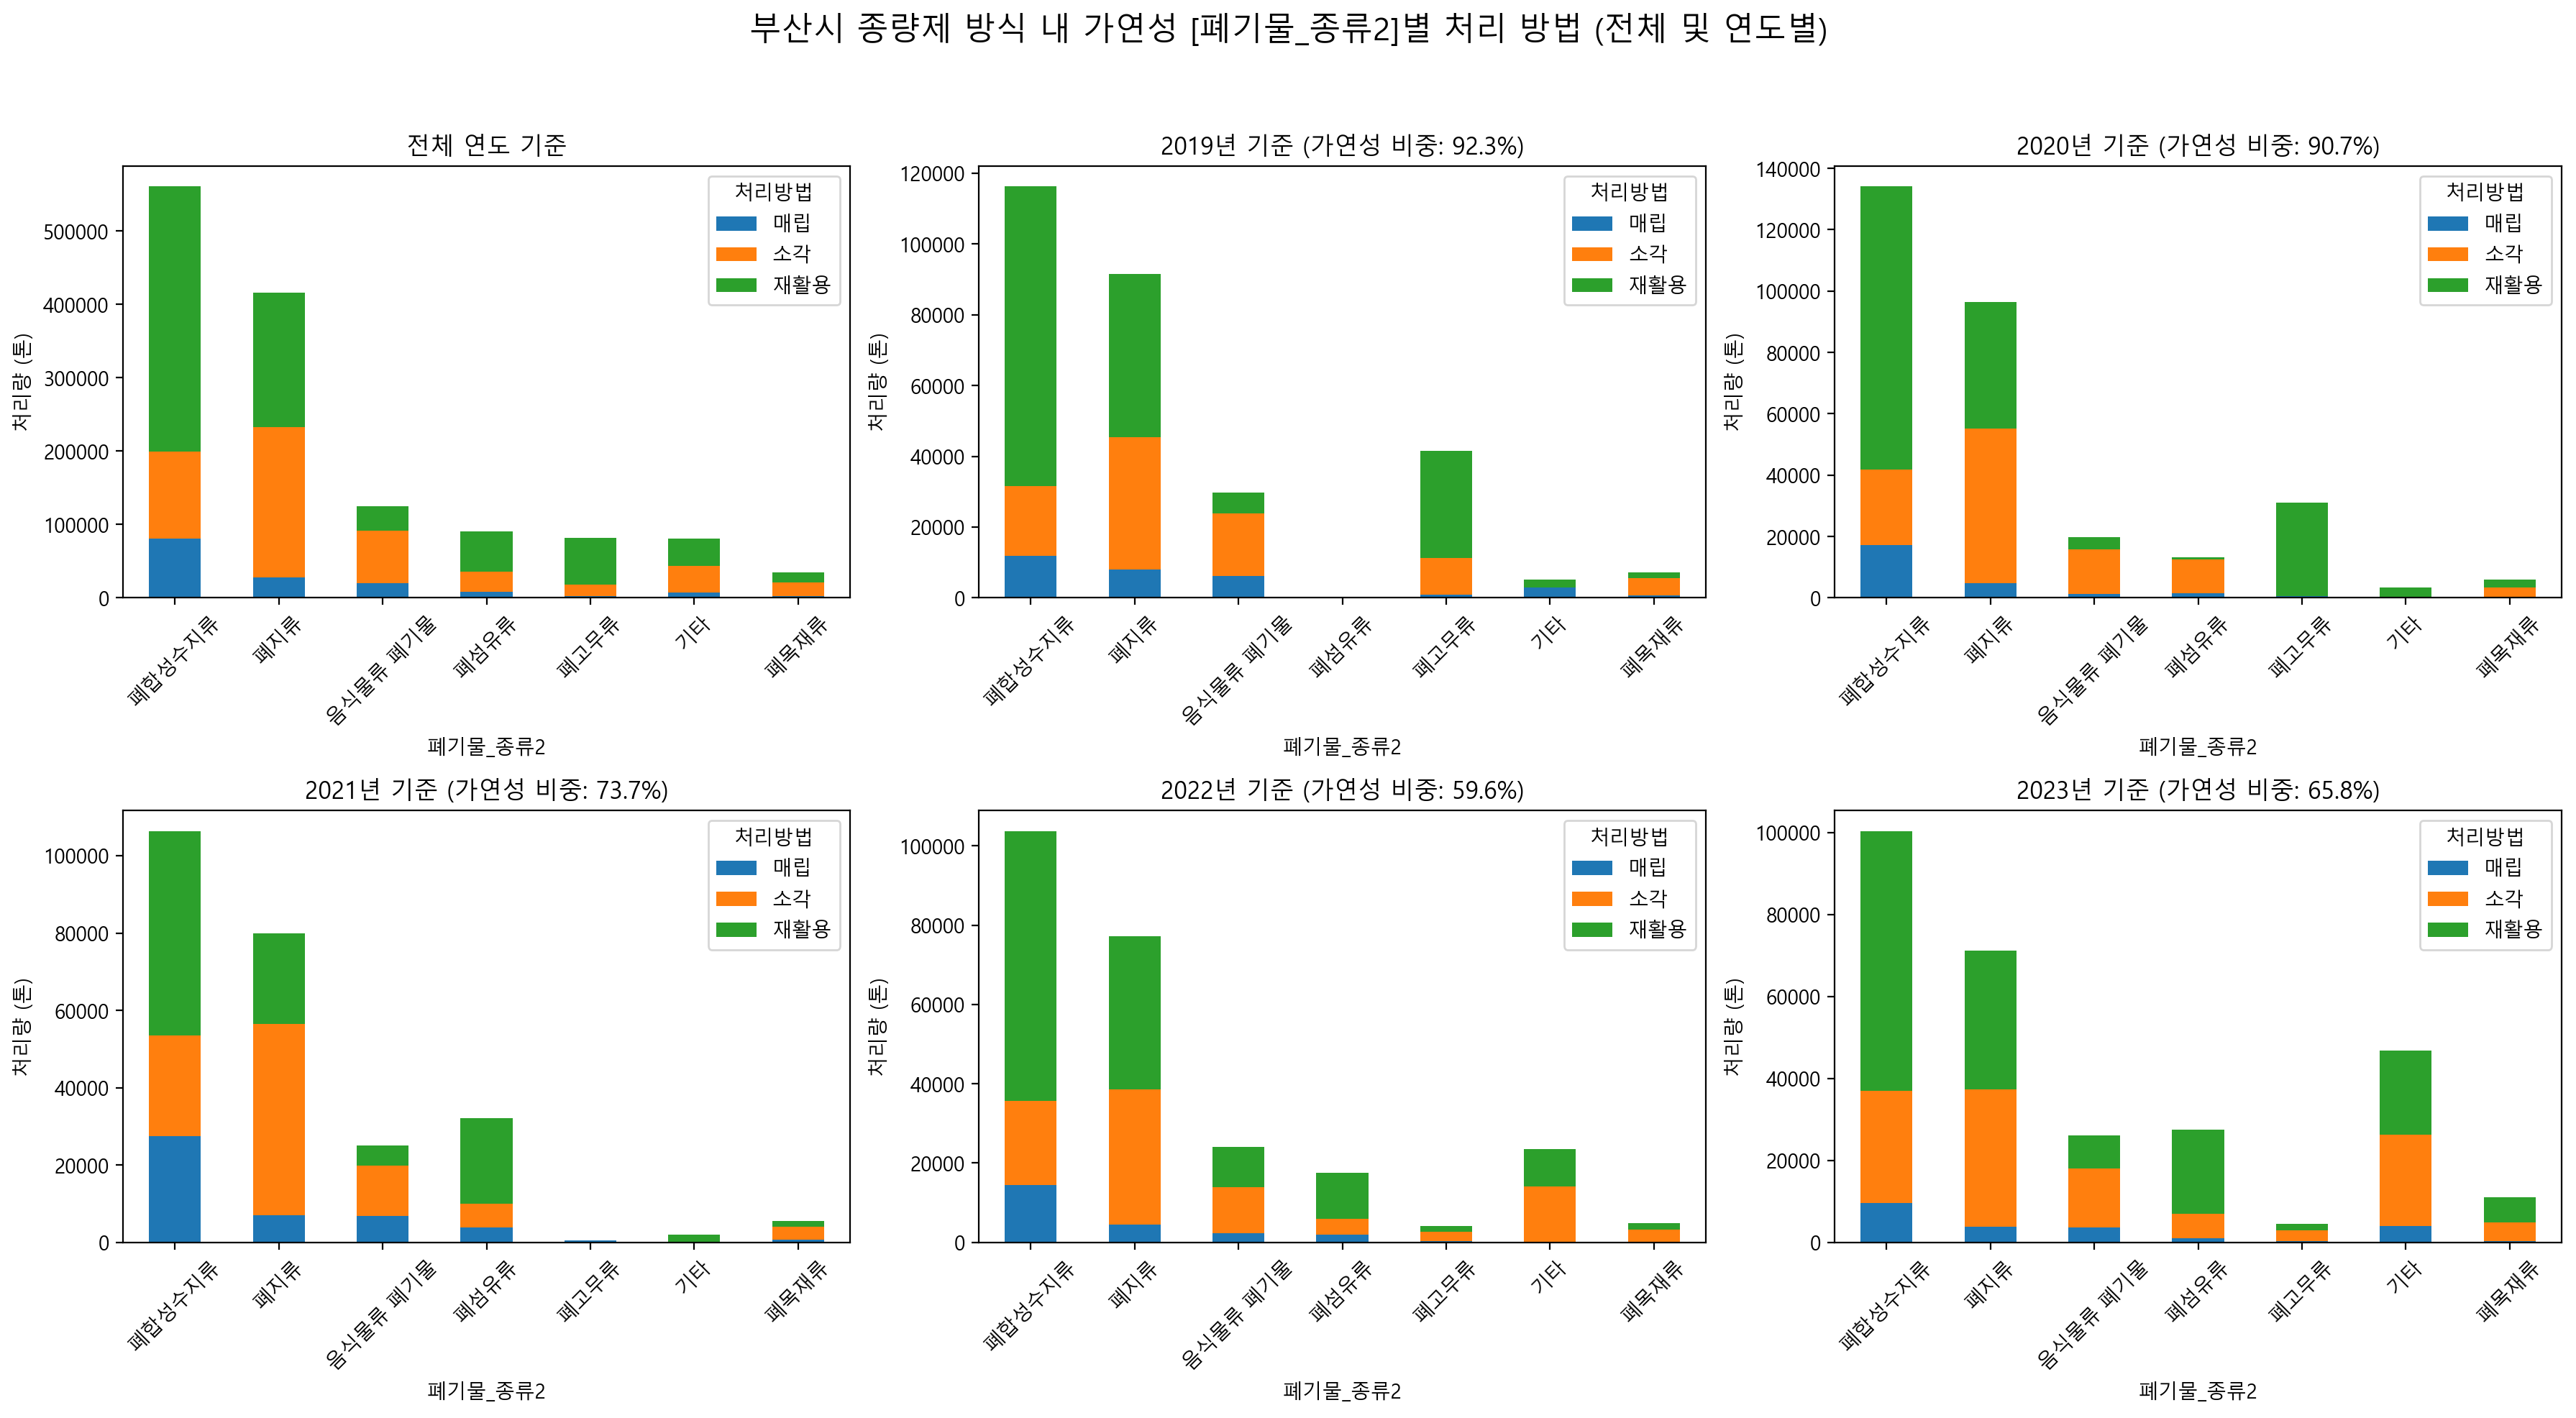

In [171]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, year in enumerate(years):
    ax = axs[i+1]

    df_year = df_grouped_long[df_grouped_long["연도"] == year]
    pivoted = df_year.pivot(index="폐기물_종류2", columns="처리방법", values="처리량").fillna(0)
    pivoted = pivoted.loc[df_grouped2.index]

    pivoted.plot(kind="bar", stacked=True, ax=ax)

    # 제목에 가연성 비중 추가
    gayeon_pct = gayeon_ratios[year]
    ax.set_title(f"{year}년 기준 (가연성 비중: {gayeon_pct}%)")
    ax.set_ylabel("처리량 (톤)")
    ax.set_xlabel("폐기물_종류2")
    ax.tick_params(axis='x', rotation=45)

# 전체 기준
pivot_total = df_grouped_long.groupby(["폐기물_종류2", "처리방법"])["처리량"].sum().unstack().fillna(0)
pivot_total = pivot_total.loc[df_grouped2.index]
pivot_total.plot(kind="bar", stacked=True, ax=axs[0])
axs[0].set_title("전체 연도 기준")
axs[0].set_ylabel("처리량 (톤)")
axs[0].set_xlabel("폐기물_종류2")
axs[0].tick_params(axis='x', rotation=45)

plt.suptitle("부산시 종량제 방식 내 가연성 [폐기물_종류2]별 처리 방법 (전체 및 연도별)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### 참고) 폐합성수지류: 플라스틱, 비닐, 발포 합성수지 등 인공적으로 만들어진 고분자 화합물로 만들어진 폐기물

<br>

### 04-3. 여기서 또 정리: 데이터를 통해 알 수 있는 사실들
1. 재활용 가능성이 높은 품목이 종량제로 유입되고 있다
    - 폐합성수지류, 폐지류, 폐섬유류 등은 `재활용 가능자원 분리배출` 대상 품목인데(100%는 아니고 뭐 각자 사정이 있겠지만), 종량제 내 가연성으로 들어와 있고, **일부만 재활용되며 상당량이 소각 또는 매립**되고 있음
    - 그래도 **폐합성수지류**만 보더라도, **종량제로 들어와서 다시 재활용으로 가는** 일을 **두 번** 하는 중임 매우매우 비효율적
    
<br>

2. 품목별 처리 경향의 차이
| 품목       | 재활용 비중               | 특징                 |
| -------- | -------------------- | ------------------ |
| 폐합성수지류   | 높음 (연간 6\~9만 톤 이상)   | 전체 물량 많고 소각·매립도 병행 |
| 폐지류      | 재활용 ↔ 소각이 비슷한 수준     | 여전히 소각량이 높음        |
| 폐섬유류     | 2020년 이후 재활용 급증      | 시민 배출 인식 개선 가능성    |
| 음식물류 폐기물 | 대다수 소각               | 종량제 내 혼입은 바람직하지 않음 |
| 기타       | 처리방법 비일관적 (연도별 편차 큼) | 분류가 모호한 폐기물 혼합 가능성 |

<br><br>

---

### 04-4. 이 분석들을 가지고 어떤 걸 주장할 수 있을까 고민중
현재 발견한 문제:
> **“재활용 가능한 폐합성수지류가 종량제에 혼합 배출되며, 선별 후 일부가 다시 재활용되는 구조”**는 "이중 처리로 인한 예산 낭비, 인력 소모, 재활용률 저하, 환경부하 증가"를 의미함. 정책적으로 해결해야 할 비효율 구조인 걸 알려주자!

1. **예측**: 어디서 종량제 내 재활용 가능 자원 배출이 많이 발생할 것인가? (재활용 실패 지역 예측)
- DV: **종량제 내 폐합성수지류, 폐지류, 폐섬유류 등의 발생량**
- IV: 인구 수, 세대 수, 1인 가구 비율, 아파트 비율, 전입전출량, 고령자 비율 등의 **연도, 시군구별** 특성
- 분석 방법: 회귀분석 (randomforest || xgboost 등 원래 하기로 한거)
- 활용: 특정 지역(구)의 분리배출 취약성 사전 파악해서 → 예방적 교육·홍보 대상 지역 선별
- 여기에 추가로 피처 중요도를 분석하여 **어떤 요인이 재활용 실패(혼합배출)** 에 영향을 미치는지 까지 알 수 있을듯?

<br>

2. **군집화**: 쓰레기 배출 특성이 유사한 지역은 어디인가?
- 입력변수: 종량제 내 재활용품 비율, 전체 폐기물 대비 종량제 비율, 인구/가구 특성(예: 고령화율, 주택유형 비율)
- 분석 방법: K-means, DBSCAN, 계층 군집화
- 활용: 비슷한 배출 특성을 가진 시군구를 묶어 → 정책 타겟팅 / 맞춤형 개선 전략 수립

<br>

3. **분류**: 해당 지역이 분리배출 취약 지역인지 아닌지 분류
- 취약(혼합배출 비중 높음) / 비취약(안 높음)으로 분류
- SVM, randomforest, xgboost 등등
- 선정된 취약 지역을 중심으로 분리배출 장려 대상 우선순위 설정
- 이걸 1번의 일부로 활용할 수 있을듯 (특정 구를 선정할 때)

<br>

> 이 아이디어들 모두 '분석을 위한 분석'이 필요함. 그래서 **처음부터 주제를 명확히 잡고, 그걸 바탕으로 분석을 전개**하는 것처럼 포장할 필요가 있을 듯 함.  

> 그래서 제목을 **정책 제안!** 으로 하기 보다는 **예측 시스템** 정도로 포장해서:  
**"혼합 배출된 재활용 자원의 추정량 예측 및 취약지역 선별 시스템 구축"** 이나  
**"분리배출 취약지역 예측 시스템"**
이렇게 지을 수 있음  

<br>

#### 앞으로 할 일: 전국 데이터를 대상으로 같은 분석을 해보자구
- 부산이 특이한 거 일수도 있고 (전체 평균과 비교해야 타당한지 알 수 있을 거 같음)
- 다양한 지역별 패턴이 있어야지 모델을 돌렸을 때 뭐가 좀 나오지 않을까,,하는 생각
- 즉, 부산에서 확인된 **“재활용 가능 품목이 종량제로 유입되고 있다”** 는 현상이 전국적인 문제인지 검증하는 것!
- 뭘 지어야 한다, 뭘 추가해야 한다 같은 구체적인 사업 계획은 없는데 차피 분석 공모니까 아이디어보단 분석의 과정에 집중..하는 걸로 주장하기ㅎ

<br>

1. DV 정의하고~ 이미 전처리한 IV 쓰자~ DV랑 IV 병합하고~
2. 결측치 처리하고~ 표준화 스케일링 하고~
3. EDA 하고 (분포나 상관관계 등등 이런 친구들 확인~)
4. target을 어떻게 정의할 건가? 정하고
    - 1) 단순 **혼합배출량** 예측 (톤 단위가 될듯함)
    - 2) 혼합배출 **비율** 예측 (종량제 내 재활용 가능 자원 비중)
    - 3) 개별 품목별 예측 (폐합성수지류 / 폐지류 etc.)
5. 모델링 하고~ 피쳐 중요성 확인하고~
6. 시군구별 예측값 분석하고
7. 예측값이 높은 지역 선별하고 (이때 3번의 분류를 활용할 수 있음 => 시간이 있다면)
8. 끝?

In [181]:
# 되돌리기
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')

# 모든 행 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)